In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import statements:
import sys
import os
import yaml
sys.path.append(os.getcwd() + '/../Client_modules/')

from mTempControl import *
import mResSweepDouble
from socProxy import makeProxy
import h5py
from PythonDrivers.control_atten import setatten
from getInputDicts import *
import time
import datetime
from run_FFS import run_FFS
from PythonDrivers.ldausbcli import CLI_Vaunix_Attn
from contextlib import contextmanager,redirect_stderr,redirect_stdout
from os import devnull
import time

# tempPath = os.path.join('Z:','t1Team','logFiles')

Could not import QickSoc: No module named 'pynq'


In [3]:
# Temperature monitoring infrastructure (this could be a module)
tc = tempController() # needs to be reinstantiated to read in latest day's logfile

In [7]:
soccfgs[0]

In [4]:
# Instantiate four instances of the RFSOC
socs=[]
soccfgs=[]

soc1,soccfg1=makeProxy('192.168.1.10')
socs.append(soc1)
soccfgs.append(soccfg1)
print(soccfg1)

soc2,soccfg2=makeProxy('192.168.1.11')
socs.append(soc2)
soccfgs.append(soccfg2)
print(soccfg2)

# soc3,soccfg3=makeProxy('192.168.1.12')
# socs.append(soc3)
# soccfgs.append(soccfg3)
# print(soccfg3)

# soc4,soccfg4=makeProxy('192.168.1.13')
# socs.append(soc4)
# soccfgs.append(soccfg4)
# print(soccfg4)

Pyro.NameServer PYRO:Pyro.NameServer@192.168.1.10:8888
myqick PYRO:obj_8ce772d92f6d469582f25a13cd0fff78@192.168.1.10:34337

QICK configuration:

	Board: ZCU216

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	7 signal generator channels:
	0:	axis_signal_gen_v4 - tProc output 1, envelope memory 65536 samples
		DAC tile 2, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	1:	axis_signal_gen_v4 - tProc output 2, envelope memory 65536 samples
		DAC tile 2, ch 1, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	2:	axis_signal_gen_v4 - tProc output 3, envelope memory 65536 samples
		DAC tile 2, ch 2, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	3:	axis_signal_gen_v4 - tProc output 4, envelope memory 65536 samples
		DAC tile 2, ch 3, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	4:	axis_signal_gen_v4 - tProc output 5, envelope memory 65536 samples
		DAC tile 3, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	5:	axis_signal_gen_v4 - tProc output 6, envelope 

# Read in sweep parameters

In [8]:
os.getcwd()

'C:\\Users\\my\\Documents\\GitHub\\HouckLab_QICK\\WorkingProjects\\QM_Team\\resonator_measurements\\FFS'

In [5]:
# Read in sweep initial confirguration from yaml file
setup_file_name='2024-04-17_Au_Ta_AnnealedAir_TAHP02.yaml'
setup_file_location = os.path.join('setup_files',setup_file_name)

stream = open(setup_file_location, 'r')
setupDict = yaml.full_load(stream)
stream.close()

# create and add wanted chipDicts, add a chip for each rfsoc
chipDicts=[]
chipDict1 = setupDict['TALE08-AIRanneal']
chipDict2 = setupDict['2024-04-15_TAHP02_Al2O3_Ta-Au-300nm_01']
# chipDict3 = setupDict['2023-10-31_TAHP02_Au_StarCryo230518-1+24nm']


chipDicts.append(chipDict1)
chipDicts.append(chipDict2)
# chipDicts.append(chipDict3)

In [ ]:
....................................................

In [ ]:
tc.changeHeaterCurrentPercent(0)

In [6]:
tc.setTemp(0)

# Set attenuations and check that we using a good power

In [6]:
savePath = r'Z:\t1Team\Data\rfsoc_dump'
attobj = CLI_Vaunix_Attn()
attobj.set_attenuation(1,10,1)
attobj.set_attenuation(1,0,2)
# attobj.set_attenuation(1,40,3)
# attobj.set_attenuation(1,5,4)

True

In [9]:
getInputDicts(chipDict2,measType='FFS',dBm_lookup_file='10_atten-channel-1_rack-setup_2024-03-08.npz')[0]

C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS


{'LO_f': 0,
 'adc_trig_offset': 0.1,
 'base_powers': array([-12.38496166, -15.31360212]),
 'gain': [30000, 30000],
 'n_expts': 700,
 'n_reps': 1,
 'n_resonators': 6,
 'n_rounds': 5,
 'names': ['5p95', '6p26'],
 'readout_length': 10000,
 'res_f': [5951.7, 6258.7],
 'ring_between_time': 50,
 'ring_up_time': 500,
 'save_path': 'Z:\\t1Team\\Data\\2024-04-19_cooldown\\2024-04-15_TAHP02_Al2O3_Ta-Au-300nm_01_NFS',
 'span_f': [2.5, 2.5]}

Frequencies out are: [4410.09419, 5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.532 s


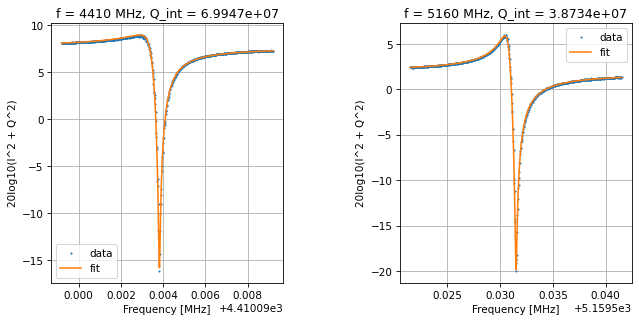

([array([ 4.41009358e+09,  6.99471351e+07,  5.78824930e+06, -1.51406815e+03,
          7.69044658e+00]),
  array([ 5.15953087e+09,  3.87343367e+07,  5.78361728e+06, -3.96314911e+03,
          1.86567059e+00])],
 [array([[ 2.10646201e+00,  2.09617328e+06, -2.52030406e+03,
           9.09265685e+00,  1.86607656e-04],
         [ 2.09617328e+06,  3.53442380e+12,  3.69108353e+09,
           9.45849057e+06, -7.88197766e+02],
         [-2.52030406e+03,  3.69108353e+09,  1.06617583e+09,
           1.74898853e+04, -1.81017267e+02],
         [ 9.09265685e+00,  9.45849057e+06,  1.74898853e+04,
           4.98629637e+01, -4.20659262e-03],
         [ 1.86607656e-04, -7.88197766e+02, -1.81017267e+02,
          -4.20659262e-03,  1.23267473e-04]]),
  array([[ 3.11856370e+00,  7.07618487e+05, -8.75631603e+03,
           1.60771886e+01,  7.67791639e-04],
         [ 7.07618487e+05,  2.75057147e+11, -2.30473822e+09,
           3.77099595e+06,  2.14095973e+02],
         [-8.75631603e+03, -2.30473822e+09,  

In [35]:
#RFSoC 10

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [0.01, 0.02]
# inputDict['span_f'] = [0.02]


# # center freqs
inputDict['res_f']=[4410.09419, 5159.5315 ]
inputDict['names']=['4p41', '5p16']

# inputDict['res_f']=[4661.96]
# inputDict['names']=['4p66']

# center freqs
# inputDict['res_f']=[6546.681, 6691.374]
# inputDict['names']=['6p54', '6p69']

# # center freqs
# inputDict['res_f']=[6945.03, 7363.165]
# inputDict['names']=['6p94', '7p36']

# center freqs
# inputDict['res_f']=[6396.70, 7734.35]
# inputDict['names']=['6p39', '7p73']

# define numbers of points
inputDict['n_expts'] = 700  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['base_powers'] = [0,0] # dBm
inputDict['gain'] = [30000, 30000]

# acquire data
# Acquire
inputDict['powers'] = inputDict['base_powers']
inputDict['save_path'] = savePath

Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='phase_test', inputDict=inputDict, soc=socs[0], soccfg=soccfgs[0])

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)

Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.255 s


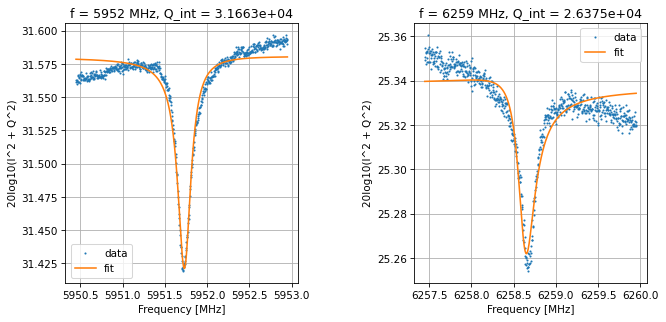

([array([5.95173440e+09, 3.16632096e+04, 1.71584805e+06, 8.35804893e+02,
         3.15802944e+01]),
  array([ 6.25862862e+09,  2.63745674e+04,  3.13976434e+06, -2.50697637e+03,
          2.53375063e+01])],
 [array([[ 2.41607355e+06,  5.28795748e+03,  2.14134601e+06,
           1.53208735e+05, -1.60034327e-02],
         [ 5.28795748e+03,  3.10079669e+05,  1.04164052e+07,
          -4.36375243e+03, -1.00459497e-01],
         [ 2.14134601e+06,  1.04164052e+07,  5.78994429e+08,
          -2.89922245e+04, -5.76982506e+00],
         [ 1.53208735e+05, -4.36375243e+03, -2.89922245e+04,
           1.75717031e+04,  8.14179321e-04],
         [-1.60034327e-02, -1.00459497e-01, -5.76982506e+00,
           8.14179321e-04,  1.47494235e-07]]),
  array([[ 1.09412397e+07, -1.27639896e+05, -8.39966451e+07,
           3.18204832e+05,  2.26382515e-01],
         [-1.27639896e+05,  6.22379632e+05,  4.95975479e+07,
           3.04742599e+04, -1.47222941e-01],
         [-8.39966451e+07,  4.95975479e+07,  7.008

In [7]:
#RFSoC 11

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [2.5, 2.5]

# # center freqs
inputDict['res_f']=[5951.7, 6258.7 ]
inputDict['names']=['4p41', '5p16']

# inputDict['res_f']=[6536.6, 6824.0]
# inputDict['names']=['5p78', '6p10']

# # center freqs
# inputDict['res_f']=[7399.46, 8003.0]
# inputDict['names']=['6p54', '6p69']

# # center freqs
# inputDict['res_f']=[6945.03, 7363.165]
# inputDict['names']=['6p94', '7p36']

# center freqs
# inputDict['res_f']=[6396.70, 7734.35]
# inputDict['names']=['6p39', '7p73']

# define numbers of points
inputDict['n_expts'] = 700  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['base_powers'] = [0,0] # dBm
inputDict['gain'] = [30000, 30000]

# acquire data
# Acquire
inputDict['powers'] = inputDict['base_powers']
inputDict['save_path'] = savePath

Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='phase_test', inputDict=inputDict, soc=socs[1], soccfg=soccfgs[1])

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)

Frequencies out are: [4418.416, 4660.223] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 11.110 s


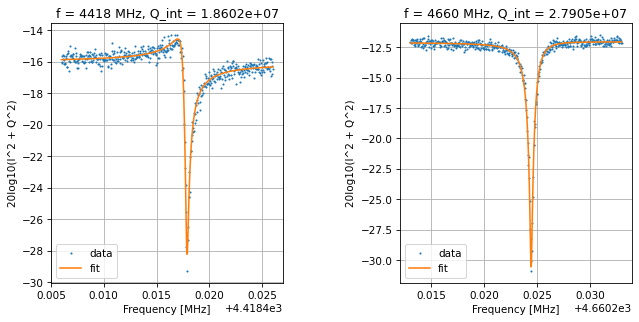

([array([ 4.41841761e+09,  1.86020898e+07,  7.56907552e+06, -1.60507547e+03,
         -1.60427209e+01]),
  array([ 4.66022449e+09,  2.79046680e+07,  3.72977510e+06,  3.46284650e+02,
         -1.21030651e+01])],
 [array([[ 5.04072269e+01,  3.10506497e+06, -1.82336091e+05,
           2.05851219e+02,  1.40156716e-02],
         [ 3.10506497e+06,  4.28496781e+11,  7.11085707e+09,
           1.51546181e+07,  2.93755869e+01],
         [-1.82336091e+05,  7.11085707e+09,  1.60376579e+10,
           3.58674069e+04, -8.13245153e+02],
         [ 2.05851219e+02,  1.51546181e+07,  3.58674069e+04,
           1.07797045e+03,  2.39258164e-02],
         [ 1.40156716e-02,  2.93755869e+01, -8.13245153e+02,
           2.39258164e-02,  2.73475481e-04]]),
  array([[ 2.93879337e+01,  2.60419532e+06,  3.71779503e+04,
           1.36703472e+02, -4.80782998e-03],
         [ 2.60419532e+06,  6.37550718e+11,  1.03679620e+10,
           1.18758050e+07, -1.90280698e+03],
         [ 3.71779503e+04,  1.03679620e+10,  

In [42]:
# RFSoC 12

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [0.02, 0.02]

# center freqs

inputDict['res_f']=[ 4418.416, 4660.223]
inputDict['names']=['4p42',
  '4p66']

# inputDict['res_f']=[ 4858.895, 4994.3475]
# inputDict['names']=['4p86',
#   '4p99']

# define numbers of points
inputDict['n_expts'] = 500  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point
# inputDict['n_reps'] = 1

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['basePowers'] = 0 # dBm
inputDict['gain'] = [20000, 20000]

# acquire data
# Acquire
inputDict['power'] = inputDict['basePowers']
Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='phase_test', inputDict=inputDict, soc=socs[0], soccfg=soccfgs[0])

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)
# mResSweepDouble.ResSweep.save_data(Instance2, data2)

Frequencies out are: [7386.783, 7998.15] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 10.991 s


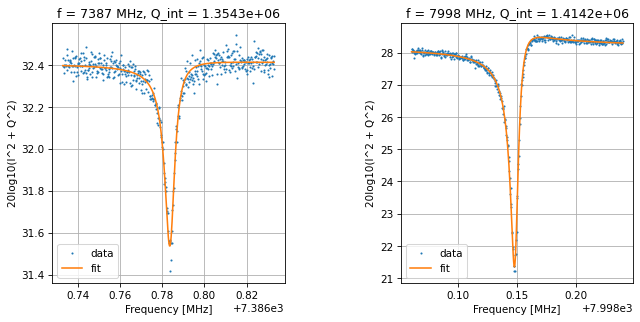

In [34]:
# RFSoC 13

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [.1, .18]

# center freqs

# inputDict['res_f']=[7386.783,7998.15]
# inputDict['names']=['4p42',
#   '4p70']

inputDict['res_f']=[7386.783,7998.15]
inputDict['names']=['4p42',
  '4p70']
# define numbers of points
inputDict['n_expts'] = 500  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point
# inputDict['n_reps'] = 1

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['basePowers'] = 0 # dBm
inputDict['gain'] = [30000, 30000]

# acquire data
# Acquire
inputDict['power'] = inputDict['basePowers']
Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='phase_test', inputDict=inputDict, soc=socs[3], soccfg=soccfgs[3])

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
pOpt,pCov= mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)
# mResSweepDouble.ResSweep.save_data(Instance2, data2)

In [11]:
from ConstantTone import *

## Constant tone experiment
UpdateConfig = {
    ###### cavity
    "read_pulse_style": "const",  # --Fixed
    "gain": 20000,  # [DAC units]
    "freq": 5970.966,  # [MHz]
    "channel": 0,  # TODO default value
    "nqz": 2,  # TODO default value
}

BaseConfig = {
    "ro_chs" : [0],
    "reps" : 10,
}

config = BaseConfig | UpdateConfig
#

ConstantTone_Instance = ConstantTone_Experiment(path="dataTestTransVsGain", outerFolder='', cfg=config,soc=socs[0], soccfg=soccfgs[0])
data_ConstantTone = ConstantTone_Experiment.acquire(ConstantTone_Instance)
# ConstantTone_Experiment.save_data(ConstantTone_Instance, data_ConstantTone)
# ConstantTone_Experiment.save_config(ConstantTone_Instance)

In [37]:
lw1 = pOpt[0][0] * ((1 / pOpt[0][1]) + (1 / pOpt[0][2])) / 1e6
lw2 = pOpt[1][0] * ((1 / pOpt[1][1]) + (1 / pOpt[1][2])) / 1e6
num_lws=20
print(num_lws*lw1,num_lws*lw2)

0.12052910168118734 0.24003935627700912


In [33]:
tc.setTemp(0.015)

In [31]:
temps=np.arange(0.015,0.290,0.020)
print(temps)

[0.015 0.035 0.055 0.075 0.095 0.115 0.135 0.155 0.175 0.195 0.215 0.235
 0.255 0.275]


In [43]:
temps = np.arange(.250,.700,.015)
print(temps)

[0.25  0.265 0.28  0.295 0.31  0.325 0.34  0.355 0.37  0.385 0.4   0.415
 0.43  0.445 0.46  0.475 0.49  0.505 0.52  0.535 0.55  0.565 0.58  0.595
 0.61  0.625 0.64  0.655 0.67  0.685]


# Take measurements

In [32]:
attobj = CLI_Vaunix_Attn()
attobj.set_attenuation(1,5,1)
attobj.set_attenuation(1,5,2)
# attobj.set_attenuation(1,5,3)
# attobj.set_attenuation(1,5,4)

True

In [11]:
np.arange(0.250,0.750,0.025)

array([0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 ,
       0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675,
       0.7  , 0.725])

[0.25  0.275 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525
 0.55  0.575 0.6   0.625 0.65  0.675 0.7   0.725]
new


  0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.572 s


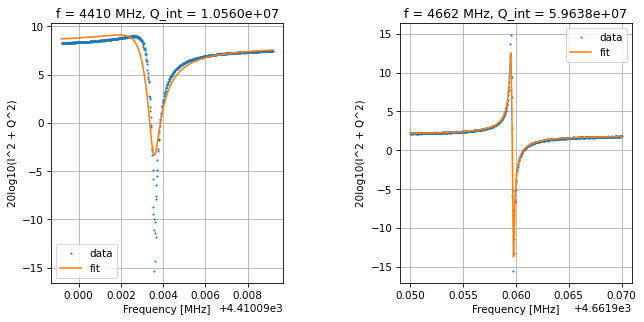

Frequencies out are: [4410.093210432349, 4661.959527117897] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.115 s


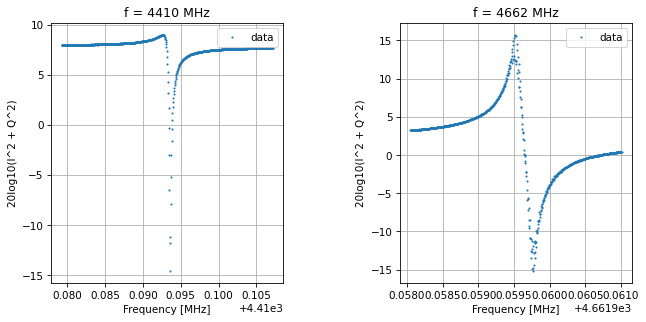

Saving data-2024-05-04-16-35-03
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.902 s


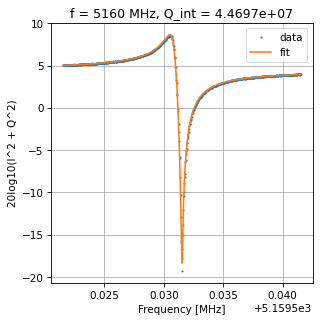

Frequencies out are: [5159.530888101372] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 65.172 s


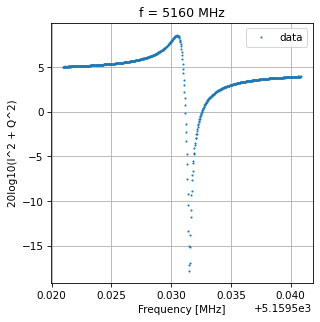

Saving data-2024-05-04-16-36-36
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.265 s


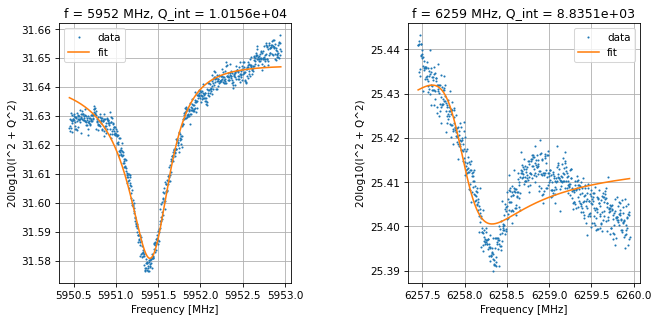

Frequencies out are: [5951.440834991137, 6257.9691354404] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 76.435 s


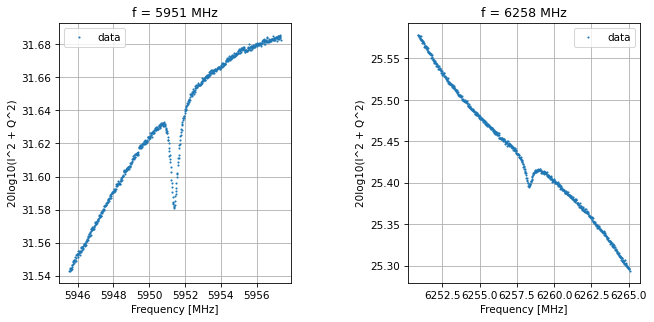

Saving data-2024-05-04-16-37-58
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.706 s


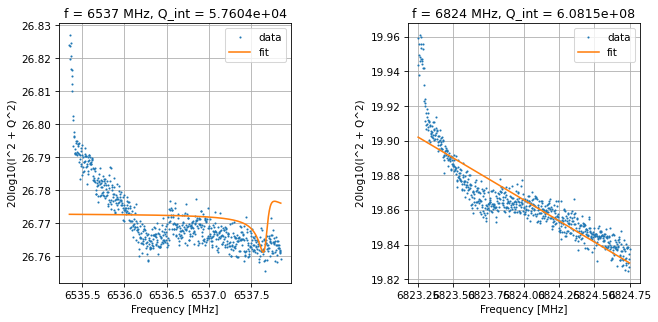

Frequencies out are: [6537.673944252167, 7884.6666215851465] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.359 s


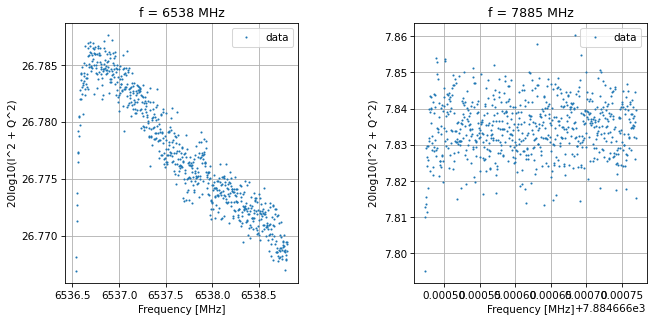

Saving data-2024-05-04-16-39-32
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.549 s


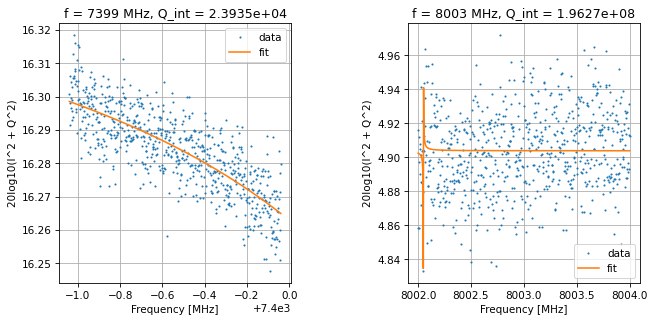

Frequencies out are: [7402.066903982329, 8002.049668793056] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.049 s


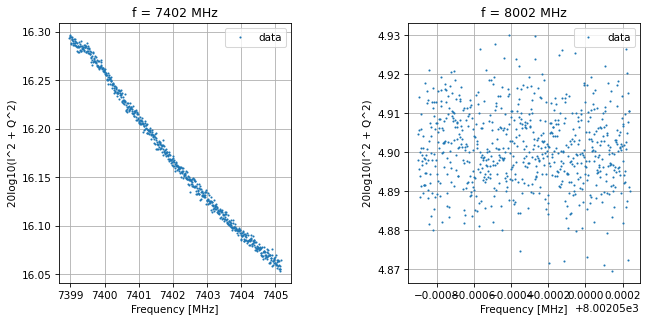

  5%|▌         | 1/20 [47:41<15:06:12, 2861.72s/it]

Saving data-2024-05-04-16-41-08
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.547 s


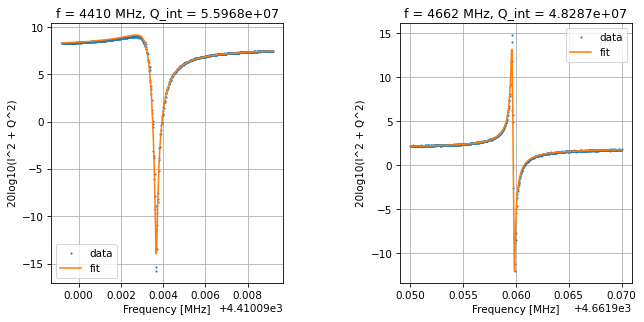

Frequencies out are: [4410.09342331869, 4661.959620863675] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.939 s


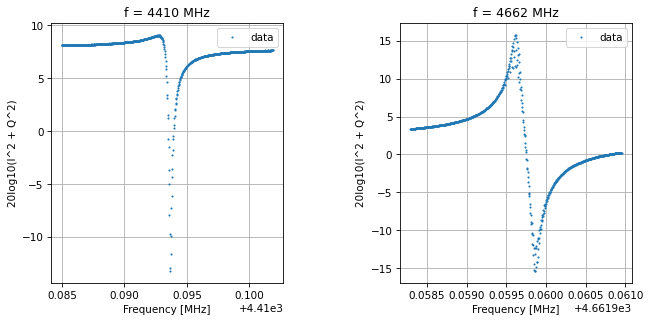

Saving data-2024-05-04-17-22-43
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.886 s


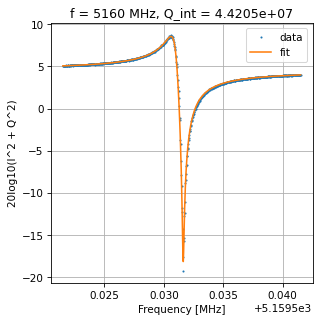

Frequencies out are: [5159.531004981631] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.519 s


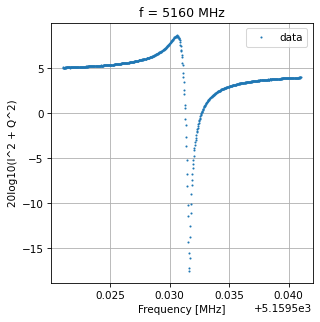

Saving data-2024-05-04-17-24-15
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.734 s


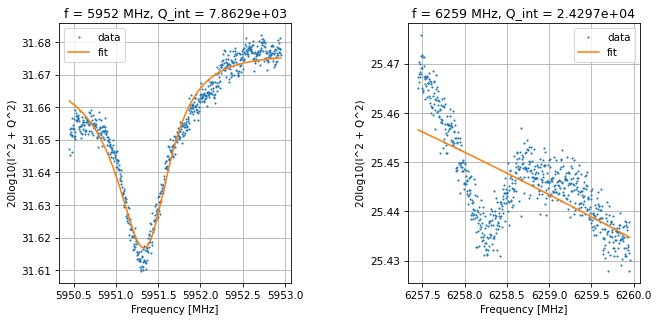

Frequencies out are: [5951.377279549285, 6295.134863512159] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.245 s


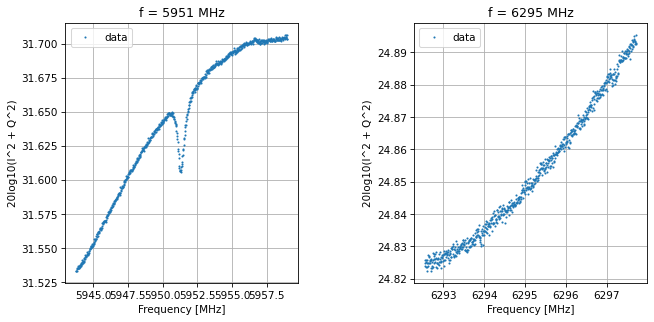

Saving data-2024-05-04-17-25-37
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.761 s


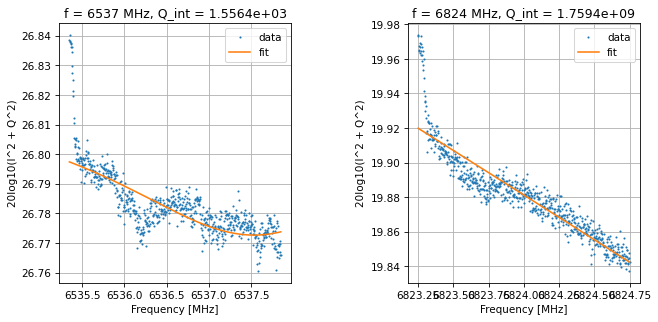

Frequencies out are: [6537.6315431006515, 7267.8953912242] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.257 s


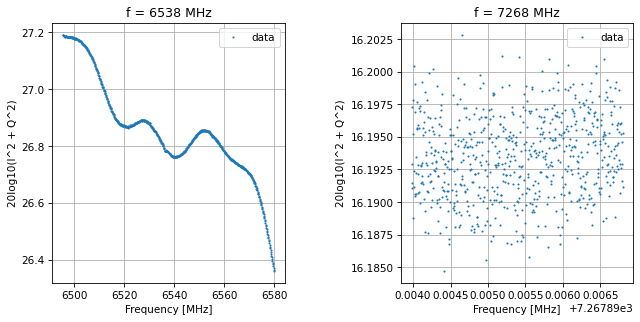

Saving data-2024-05-04-17-27-13
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.605 s


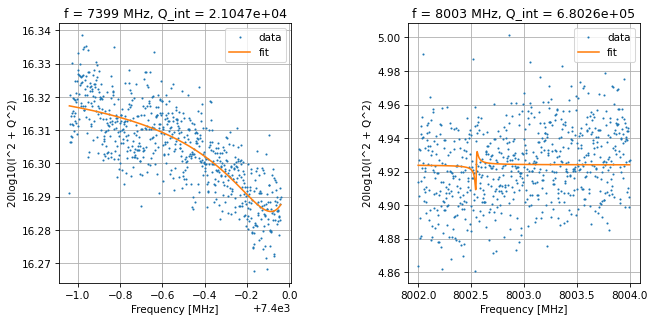

Frequencies out are: [7400.090151102282, 8002.549371370932] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.416 s


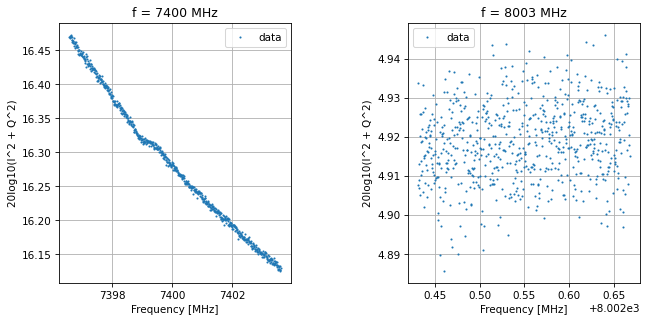

 10%|█         | 2/20 [1:35:23<14:18:28, 2861.58s/it]

Saving data-2024-05-04-17-28-49
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.656 s


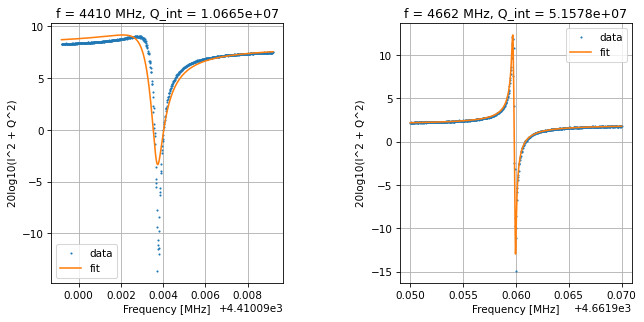

Frequencies out are: [4410.093369272974, 4661.959715534266] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.093 s


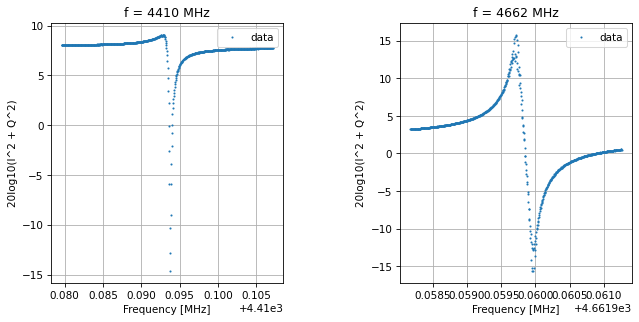

Saving data-2024-05-04-18-10-25
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 13.099 s


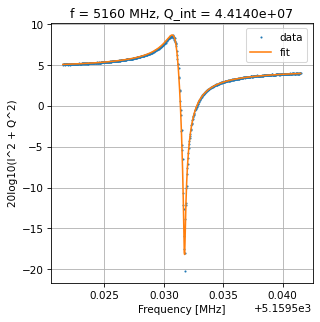

Frequencies out are: [5159.531092219464] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.716 s


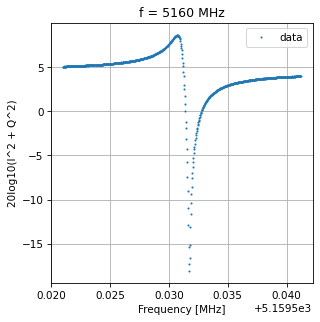

Saving data-2024-05-04-18-11-58
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.611 s


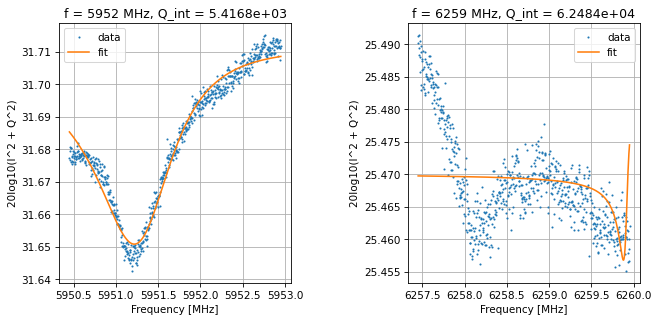

Frequencies out are: [5951.288852586392, 6259.912529957602] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.427 s


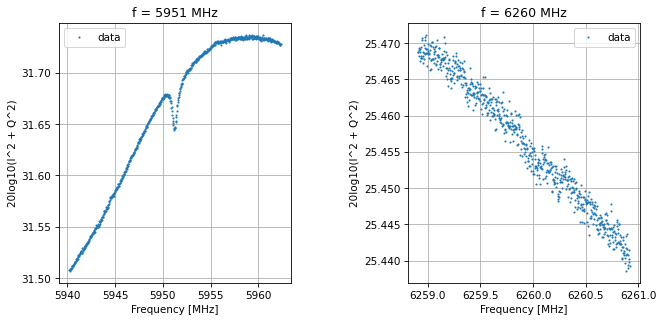

Saving data-2024-05-04-18-13-19
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.793 s


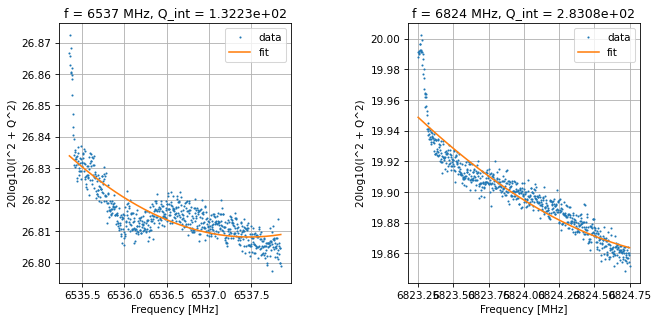

Frequencies out are: [7264.415183690176, 6866.202453007602] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.110 s


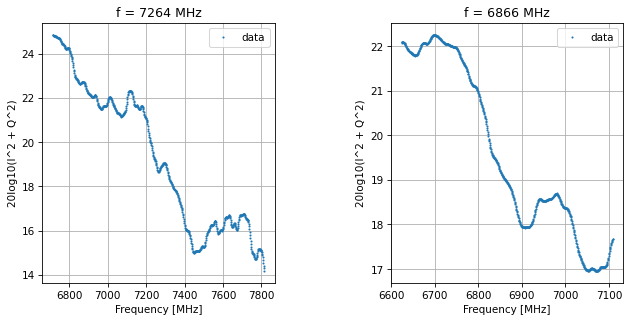

Saving data-2024-05-04-18-14-57
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.689 s


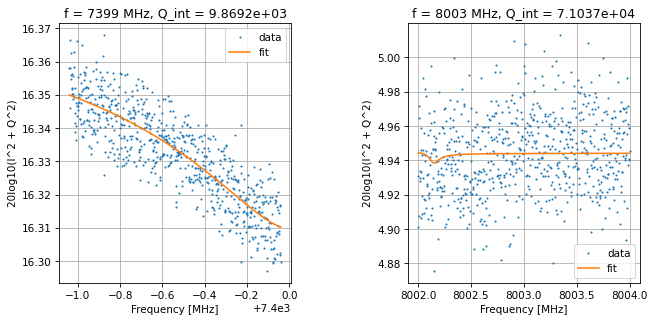

Frequencies out are: [7400.38956307554, 8002.136908246215] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 79.076 s


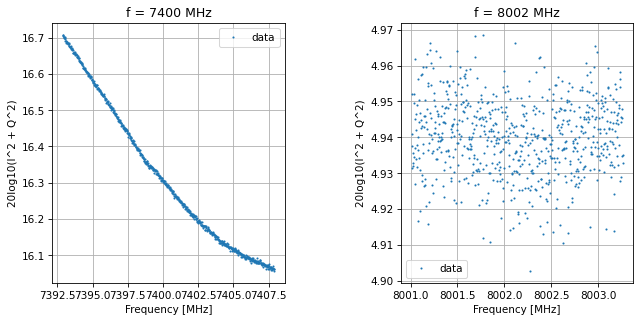

 15%|█▌        | 3/20 [2:23:07<13:31:05, 2862.69s/it]

Saving data-2024-05-04-18-16-32
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.614 s


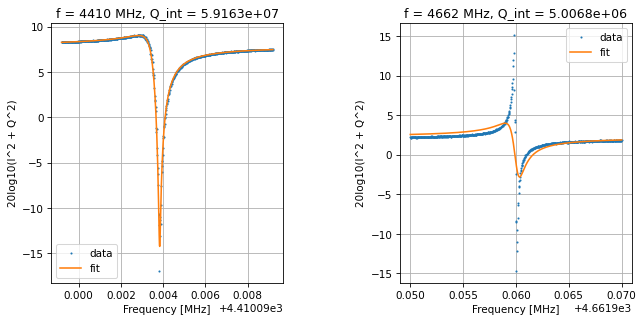

Frequencies out are: [4410.093598634504, 4661.959766138086] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.020 s


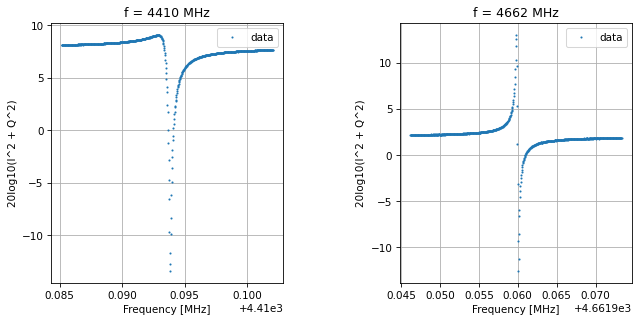

Saving data-2024-05-04-18-58-09
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 13.051 s


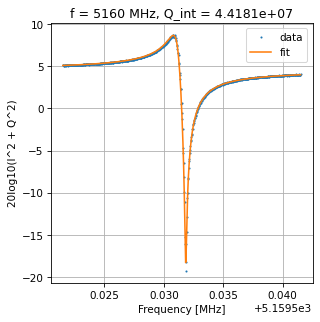

Frequencies out are: [5159.53119921864] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.884 s


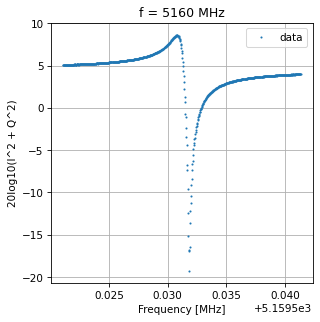

Saving data-2024-05-04-18-59-41
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.753 s


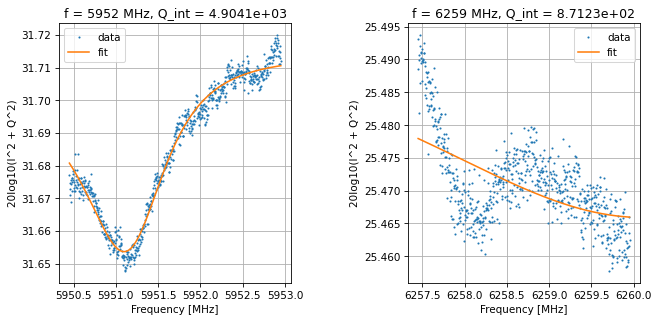

Frequencies out are: [5951.177850840471, 6259.765382949136] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.562 s


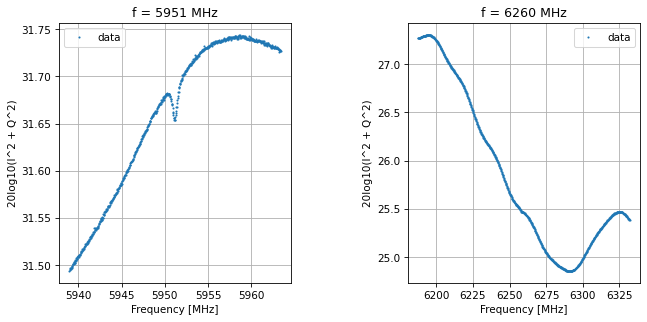

Saving data-2024-05-04-19-01-03
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.685 s


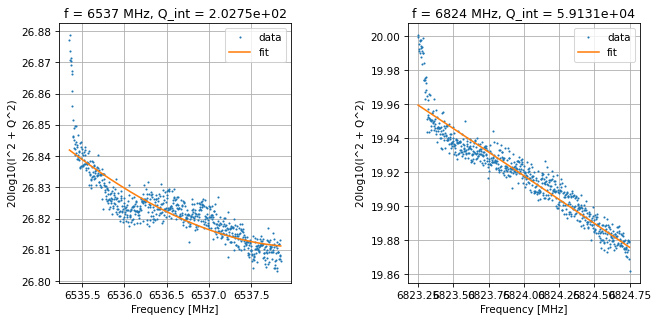

Frequencies out are: [6559.894746394613, 6964.986220993887] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.301 s


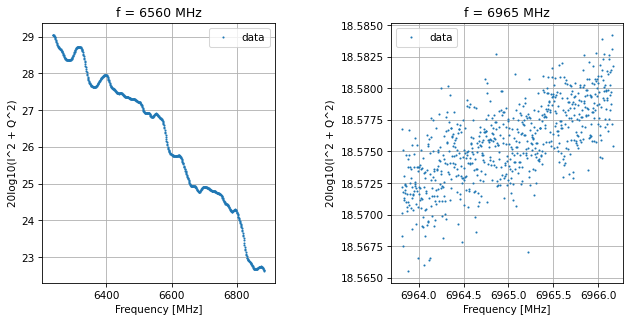

Saving data-2024-05-04-19-02-40
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.580 s


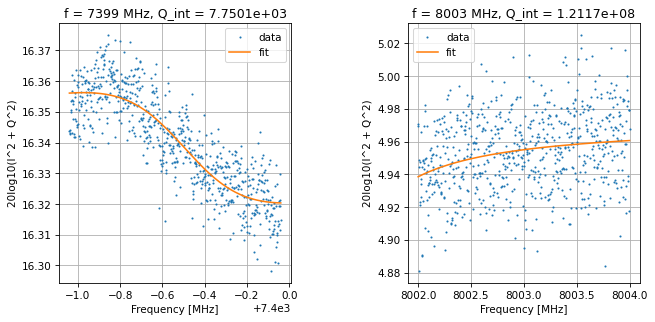

Frequencies out are: [7399.5034028135815, 8000.983981569724] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.225 s


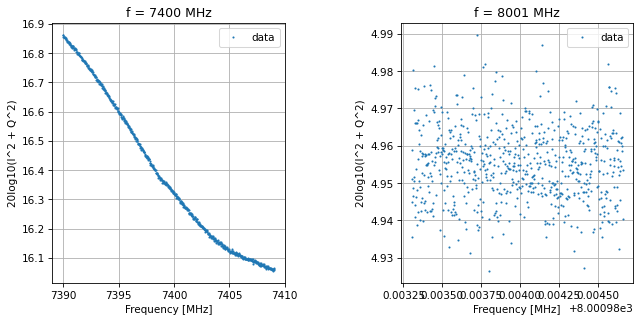

 20%|██        | 4/20 [3:10:49<12:43:23, 2862.72s/it]

Saving data-2024-05-04-19-04-16
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.589 s


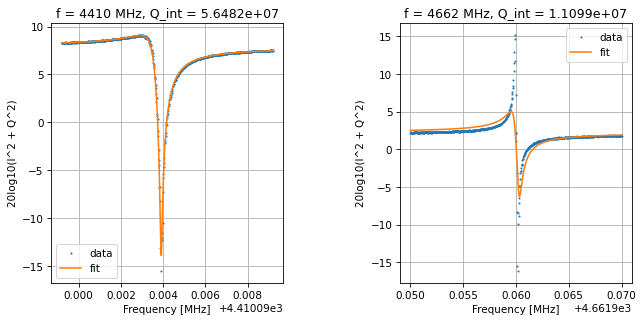

Frequencies out are: [4410.09367182451, 4661.959922132976] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.789 s


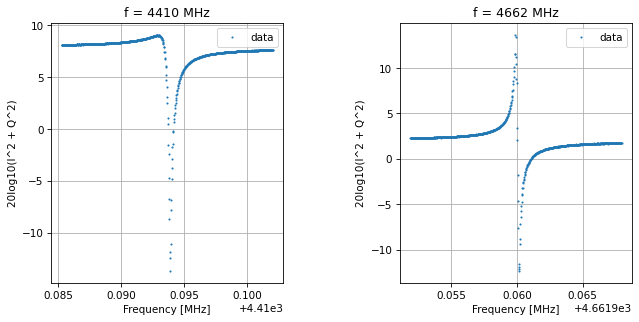

Saving data-2024-05-04-19-45-52
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.940 s


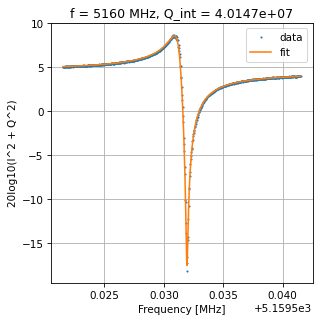

Frequencies out are: [5159.531302036963] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.739 s


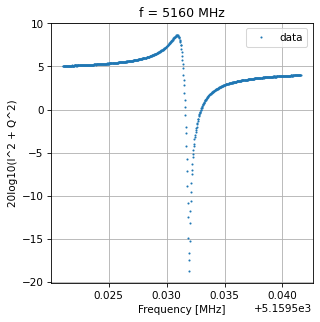

Saving data-2024-05-04-19-47-24
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.582 s


C:\Users\my\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


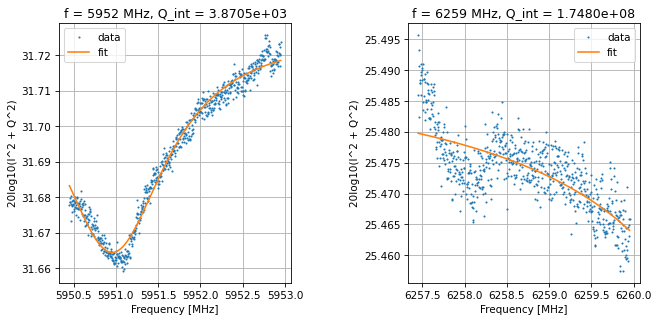

Frequencies out are: [5950.954528374394, 6262.404611113221] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.647 s


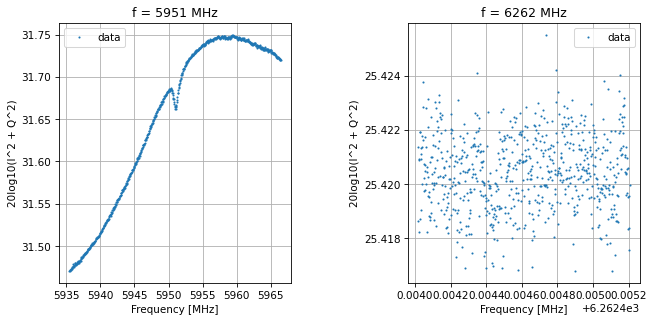

Saving data-2024-05-04-19-48-46
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.597 s


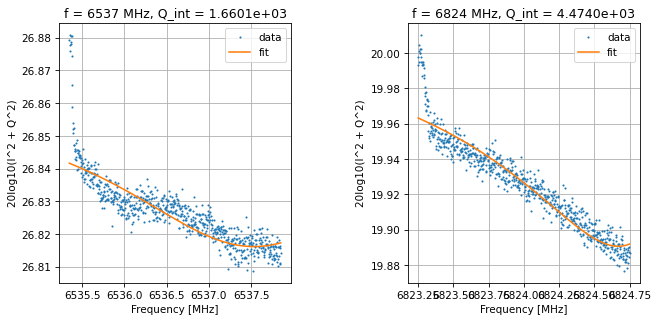

Frequencies out are: [6537.4999059647125, 6825.12100611662] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.597 s


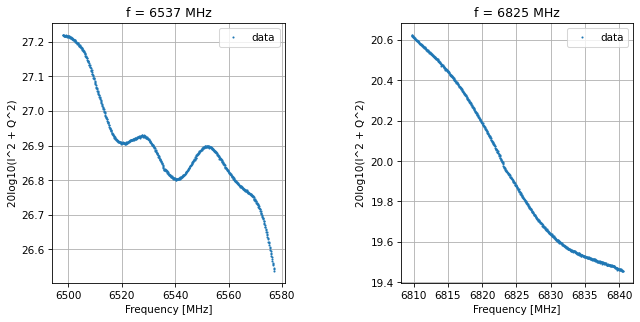

Saving data-2024-05-04-19-50-22
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.756 s


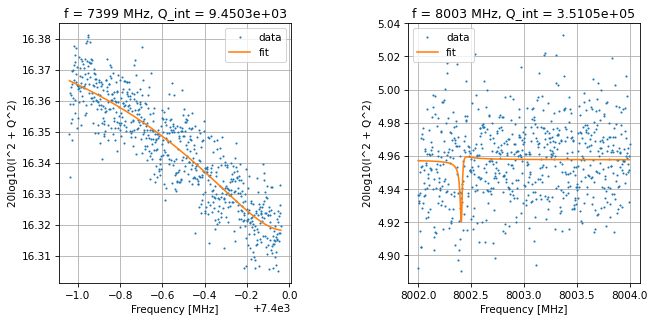

Frequencies out are: [7400.366353572369, 8002.410590217802] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.363 s


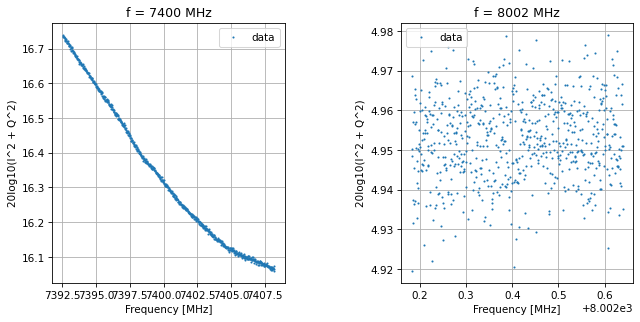

 25%|██▌       | 5/20 [3:58:32<11:55:38, 2862.59s/it]

Saving data-2024-05-04-19-51-58
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.645 s


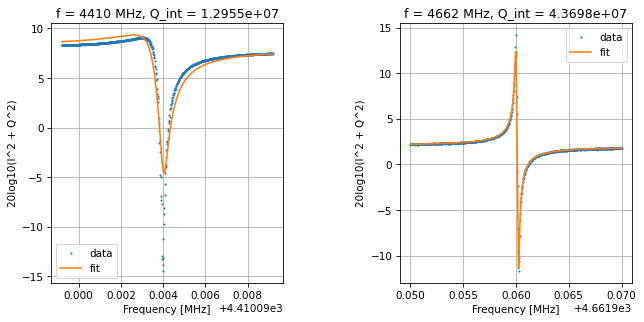

Frequencies out are: [4410.093663015084, 4661.960003752562] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.968 s


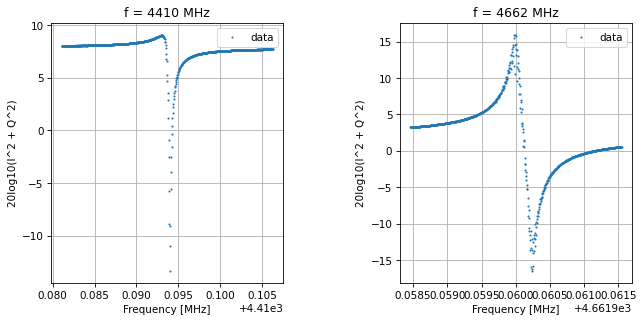

Saving data-2024-05-04-20-33-34
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.867 s


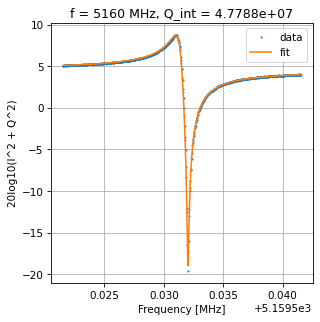

Frequencies out are: [5159.531387086512] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.659 s


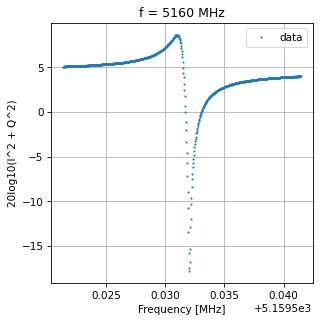

Saving data-2024-05-04-20-35-06
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.698 s


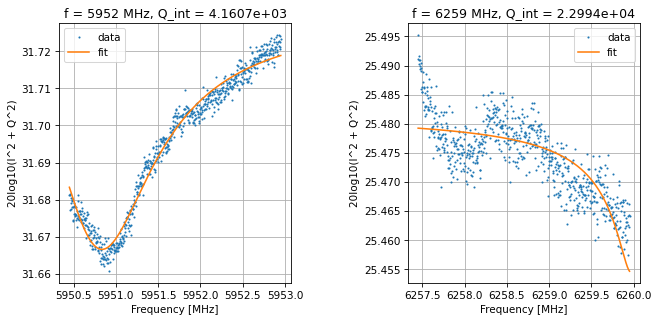

Frequencies out are: [5950.701311690703, 6260.095687433248] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.503 s


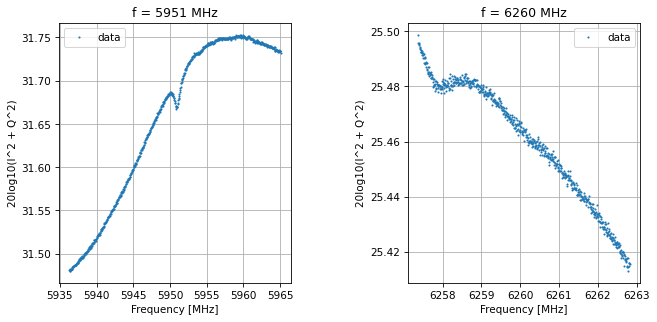

Saving data-2024-05-04-20-36-28
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.693 s


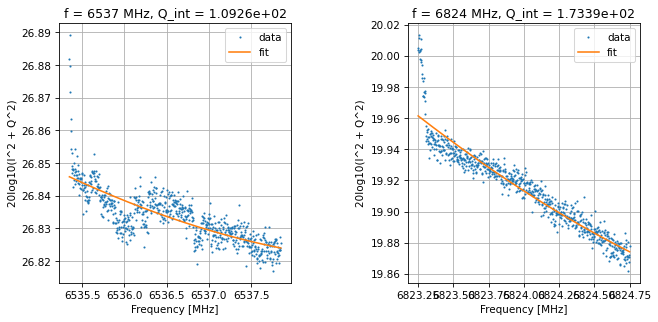

Frequencies out are: [6584.069097204027, 6939.470170304086] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.343 s


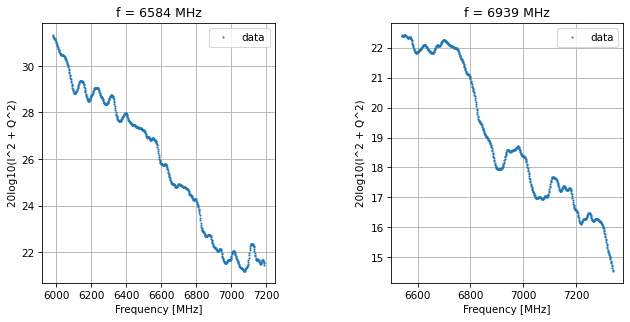

Saving data-2024-05-04-20-38-05
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.608 s


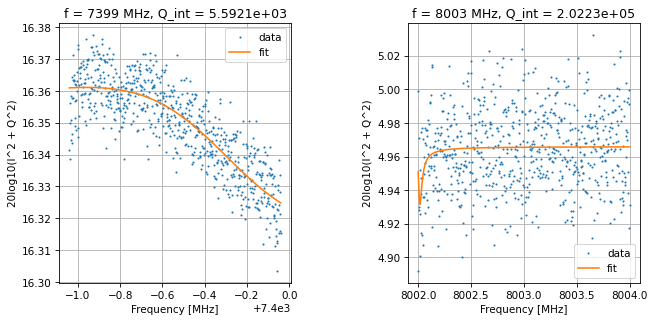

Frequencies out are: [7399.701175406943, 8002.010211568789] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.152 s


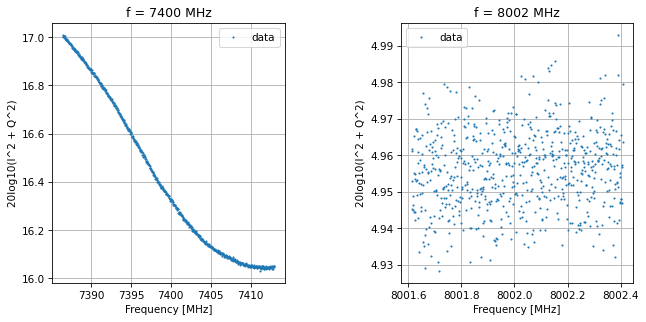

 30%|███       | 6/20 [4:46:14<11:07:55, 2862.53s/it]

Saving data-2024-05-04-20-39-41
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.641 s


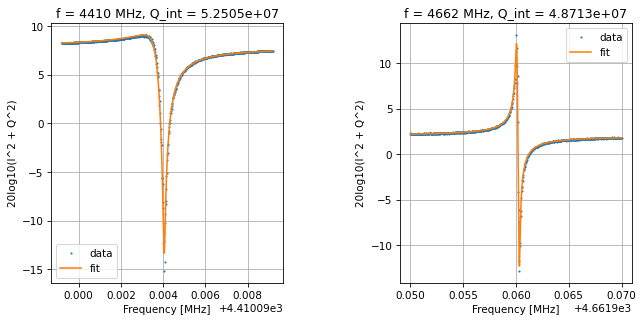

Frequencies out are: [4410.0938022984055, 4661.96007777664] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.208 s


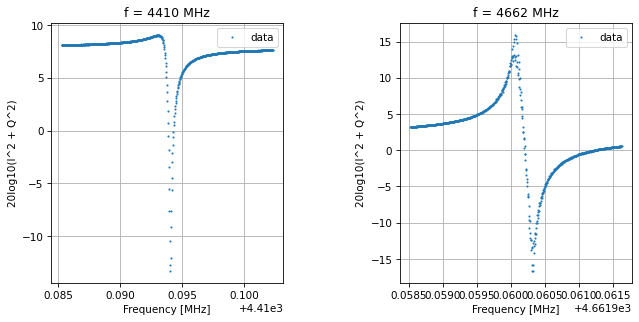

Saving data-2024-05-04-21-21-16
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 13.057 s


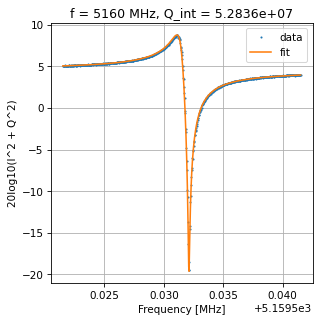

Frequencies out are: [5159.5314743874505] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.772 s


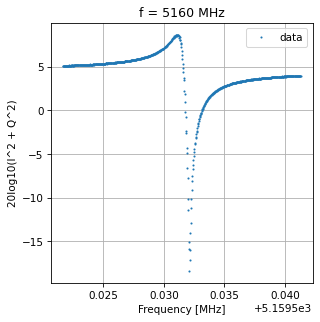

Saving data-2024-05-04-21-22-49
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.449 s


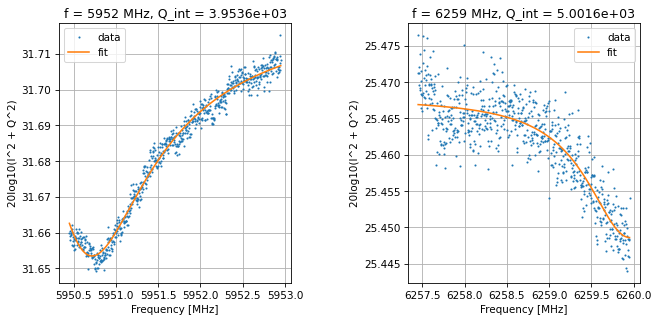

Frequencies out are: [5950.457346243609, 6259.928697563685] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.219 s


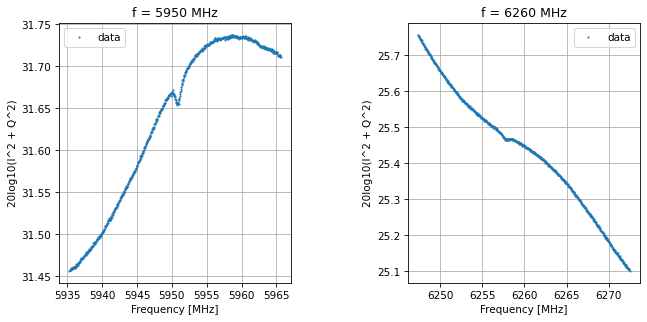

Saving data-2024-05-04-21-24-11
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.524 s


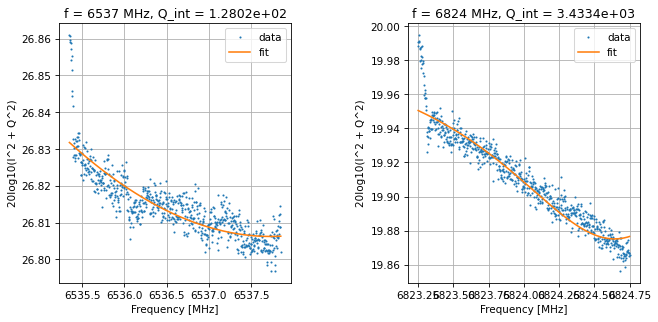

Frequencies out are: [6604.09061584353, 6824.753916963522] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.428 s


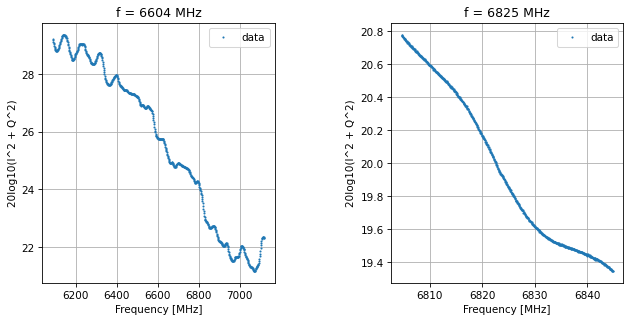

Saving data-2024-05-04-21-25-47
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.624 s


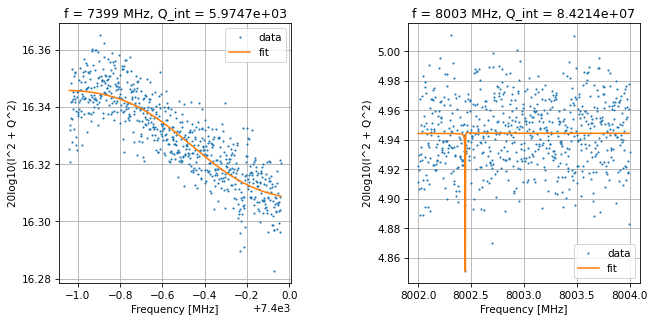

Frequencies out are: [7399.533837280292, 8002.4452836948385] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.527 s


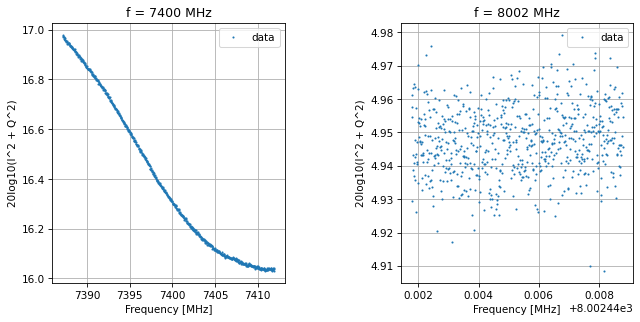

 35%|███▌      | 7/20 [5:33:56<10:20:10, 2862.37s/it]

Saving data-2024-05-04-21-27-23
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.565 s


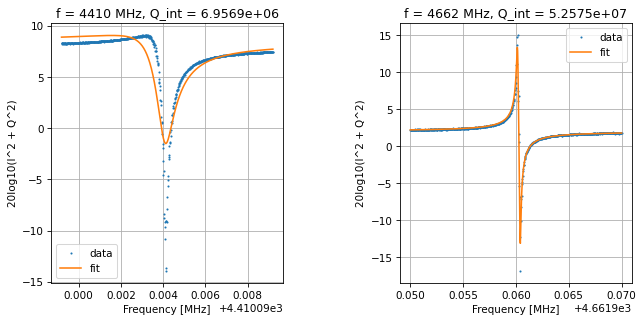

Frequencies out are: [4410.093731815156, 4661.960153663294] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.963 s


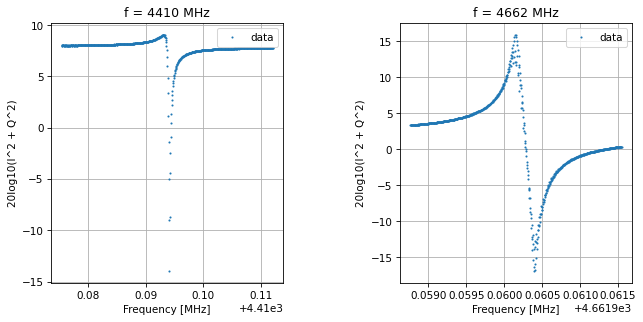

Saving data-2024-05-04-22-08-58
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.907 s


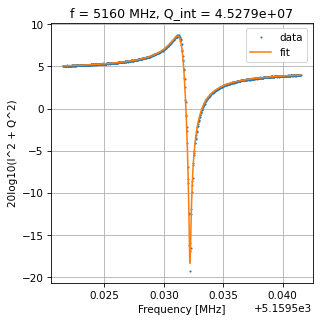

Frequencies out are: [5159.531564460657] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.932 s


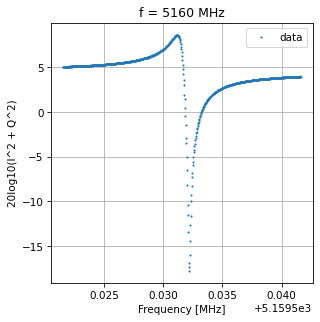

Saving data-2024-05-04-22-10-31
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.569 s


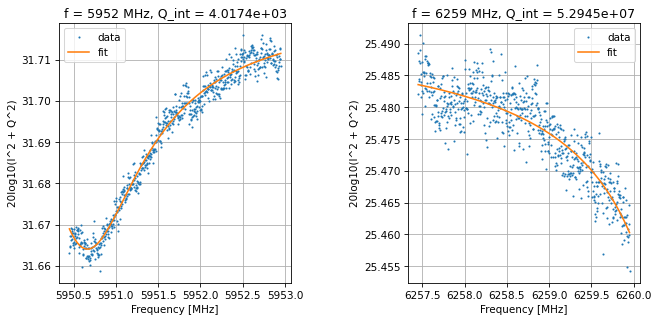

Frequencies out are: [5950.496531471976, 6261.034225766773] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.467 s


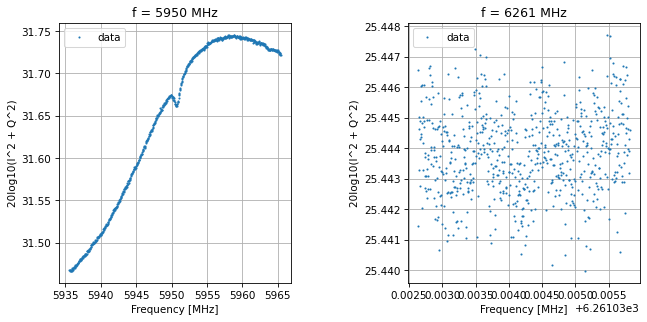

Saving data-2024-05-04-22-11-52
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.674 s


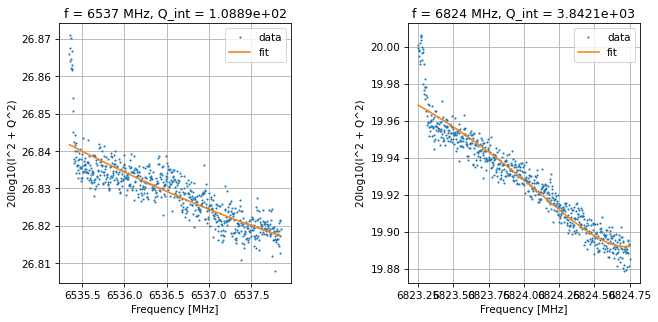

Frequencies out are: [6581.493047717037, 6825.448503222329] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.902 s


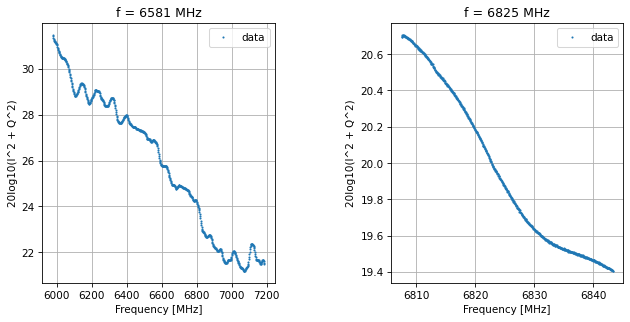

Saving data-2024-05-04-22-13-29
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.650 s


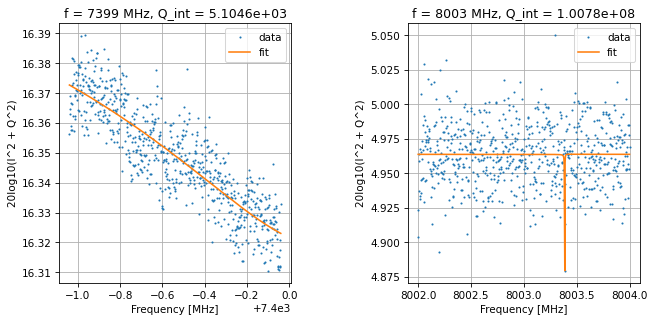

Frequencies out are: [7400.776656591039, 8003.386523570841] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.301 s


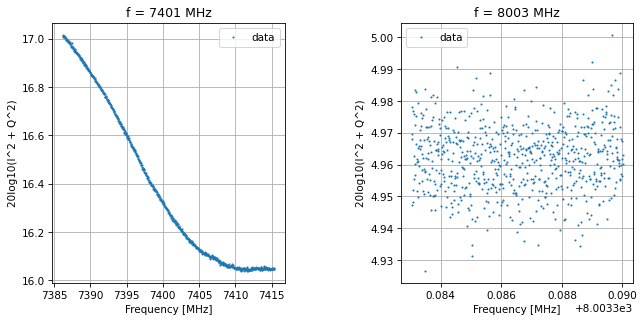

 40%|████      | 8/20 [6:21:38<9:32:25, 2862.12s/it] 

Saving data-2024-05-04-22-15-04
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.480 s


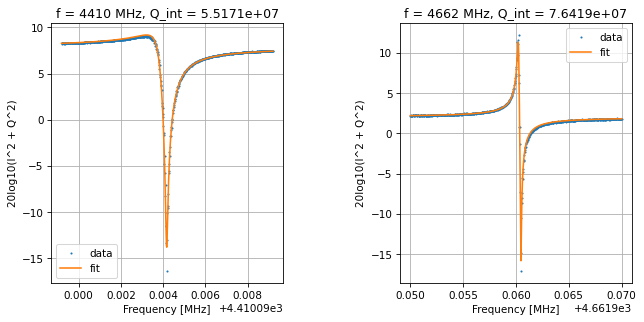

Frequencies out are: [4410.093914648795, 4661.960240067502] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.035 s


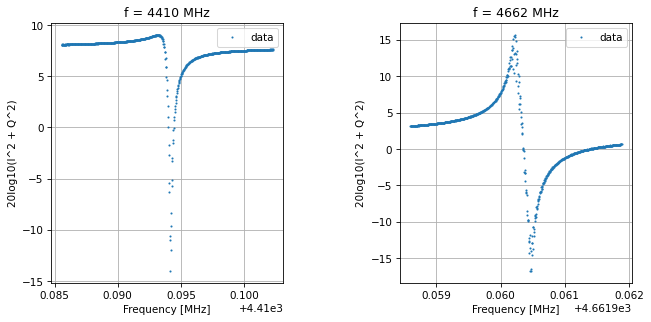

Saving data-2024-05-04-22-56-40
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.957 s


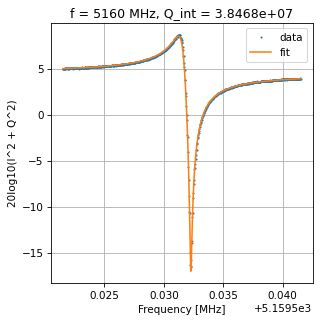

Frequencies out are: [5159.531634124798] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.880 s


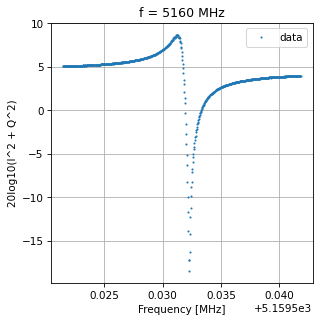

Saving data-2024-05-04-22-58-12
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.651 s


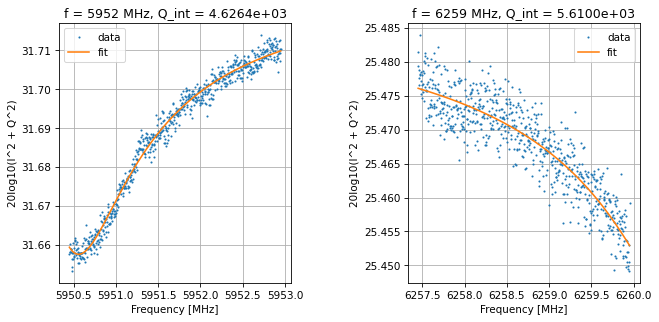

Frequencies out are: [5950.221865565784, 6261.150817994688] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.602 s


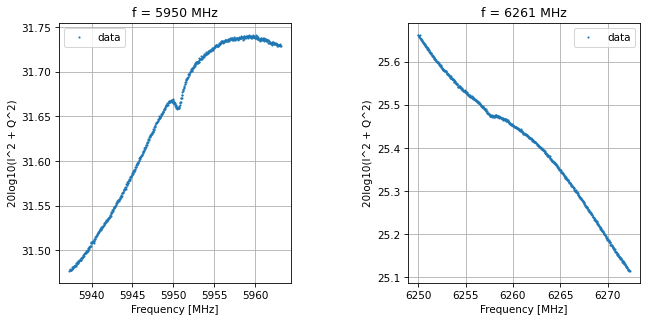

Saving data-2024-05-04-22-59-34
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.736 s


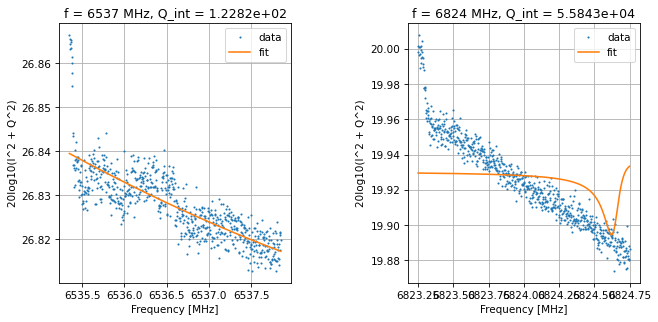

Frequencies out are: [6537.582252684736, 6824.643502147944] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.729 s


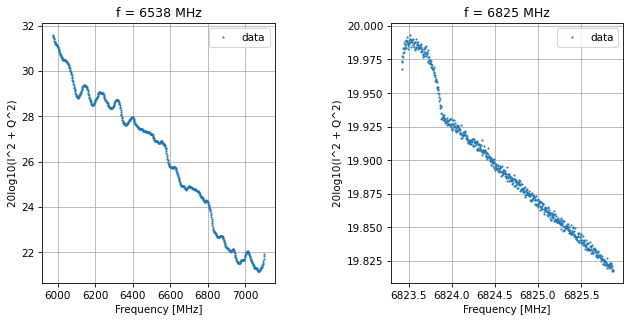

Saving data-2024-05-04-23-01-11
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.698 s


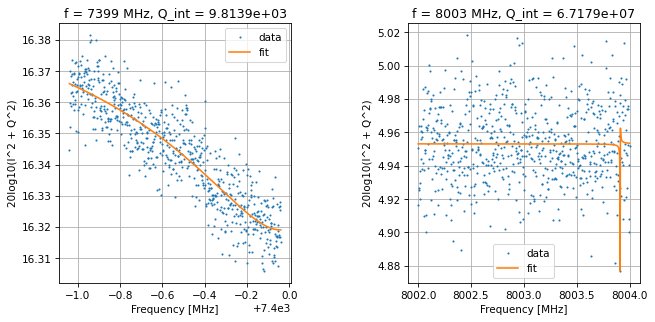

Frequencies out are: [7400.336330556138, 8003.91105792706] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.863 s


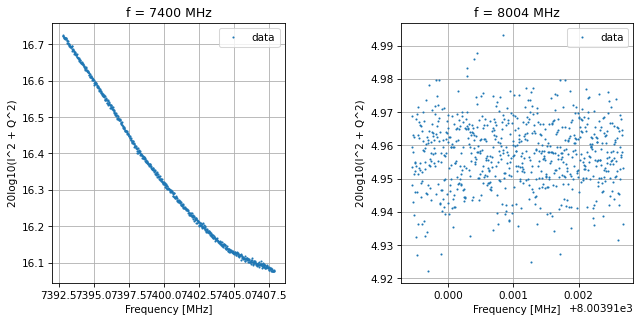

 45%|████▌     | 9/20 [7:09:20<8:44:43, 2862.18s/it]

Saving data-2024-05-04-23-02-47
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.528 s


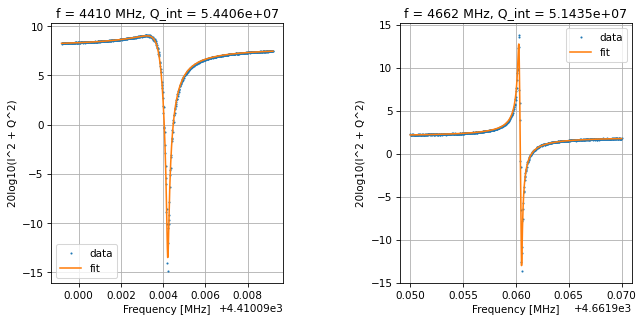

Frequencies out are: [4410.093986045557, 4661.96028544768] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.187 s


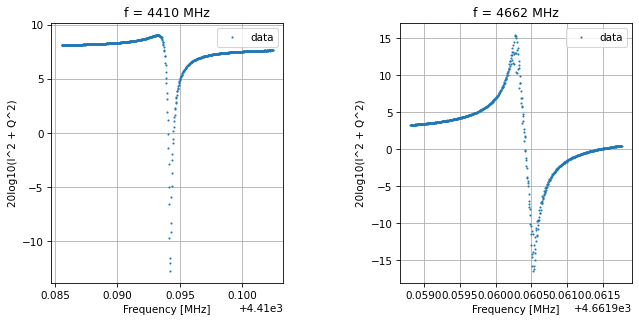

Saving data-2024-05-04-23-44-22
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 13.083 s


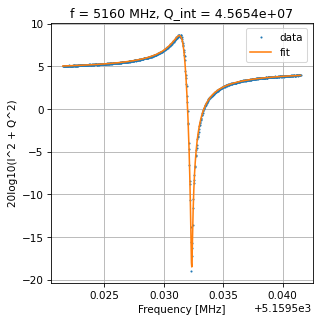

Frequencies out are: [5159.531702736276] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.911 s


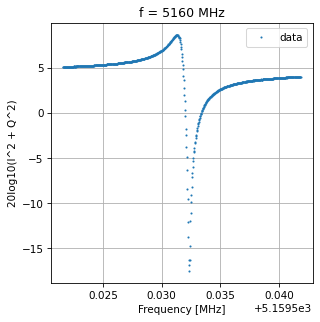

Saving data-2024-05-04-23-45-55
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 14.883 s


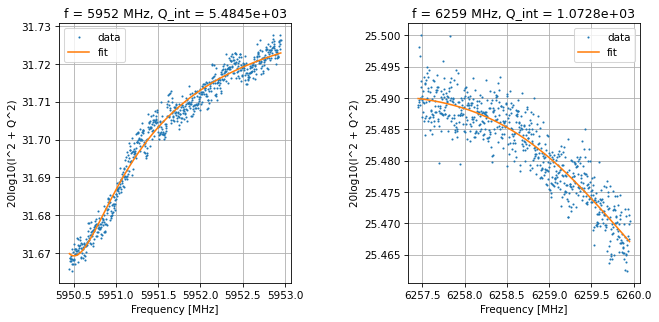

Frequencies out are: [5950.141328217481, 6259.950173849942] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.505 s


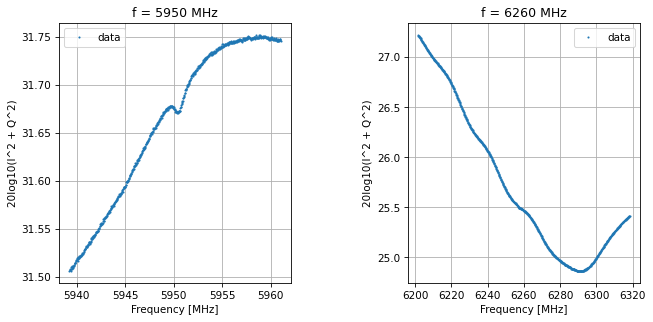

Saving data-2024-05-04-23-47-16
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.749 s


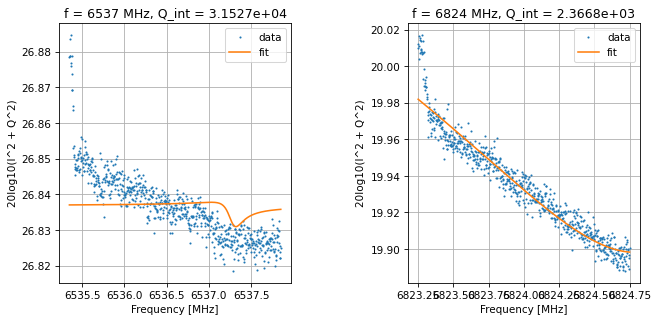

Frequencies out are: [6537.27660247415, 6826.225781155769] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.651 s


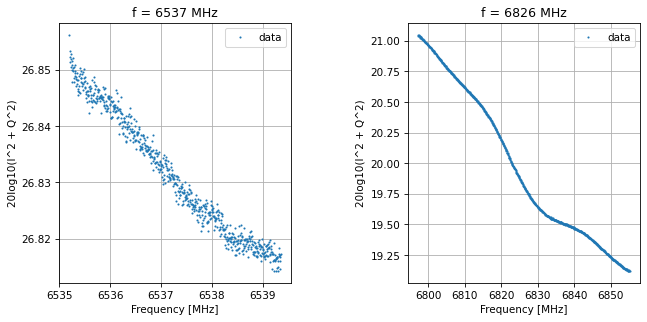

Saving data-2024-05-04-23-48-52
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.666 s


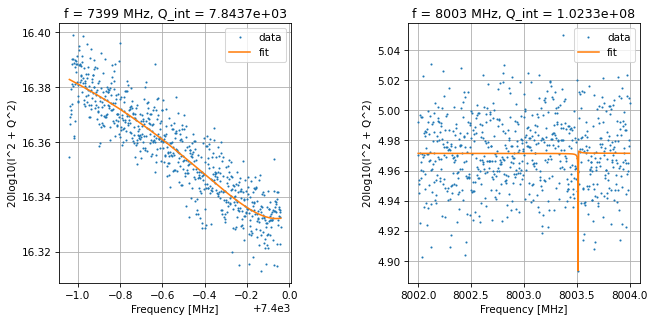

Frequencies out are: [7400.417806134977, 8003.5146559080185] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.420 s


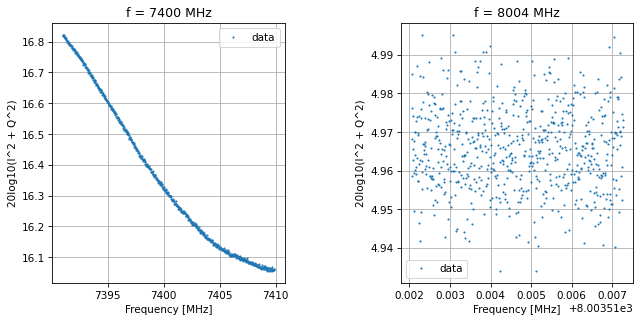

 50%|█████     | 10/20 [7:57:02<7:57:00, 2862.06s/it]

Saving data-2024-05-04-23-50-28
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.606 s


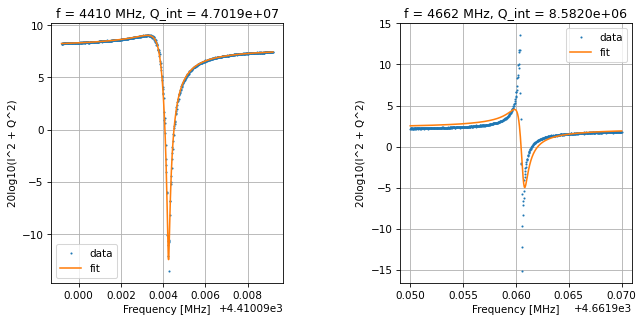

Frequencies out are: [4410.094015407653, 4661.960386890292] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.845 s


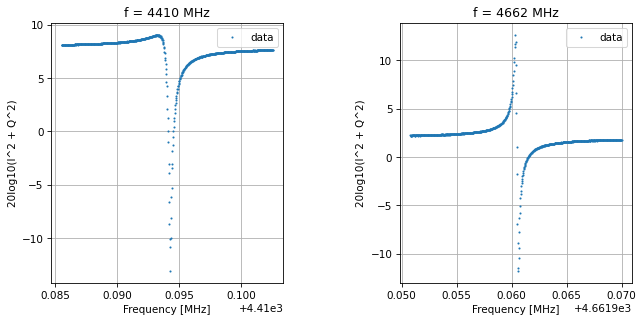

Saving data-2024-05-05-00-32-04
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.950 s


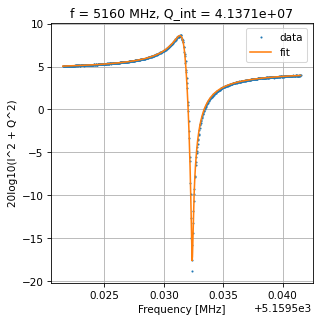

Frequencies out are: [5159.531754330147] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.935 s


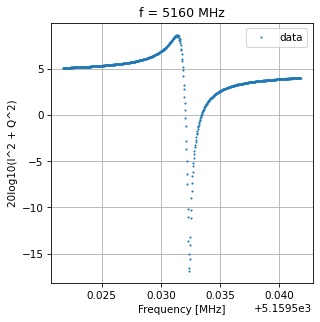

Saving data-2024-05-05-00-33-36
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.652 s


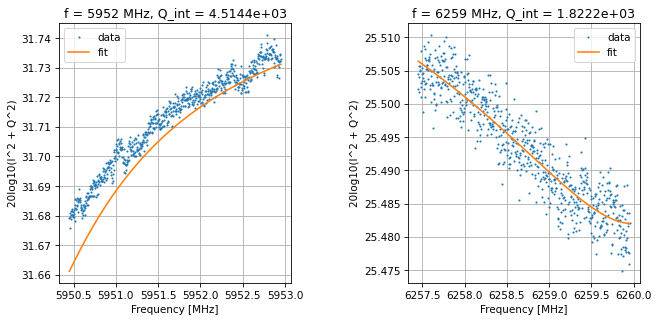

Frequencies out are: [5949.182894787336, 6261.509509930035] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.311 s


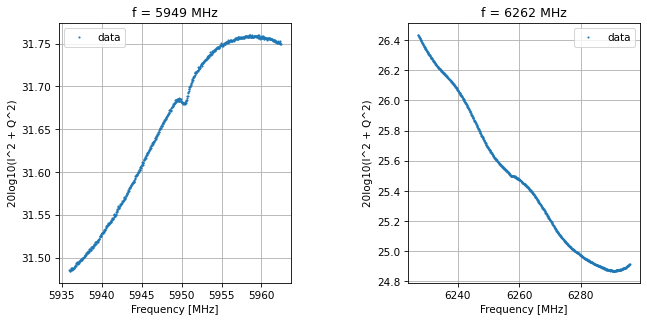

Saving data-2024-05-05-00-34-58
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.716 s


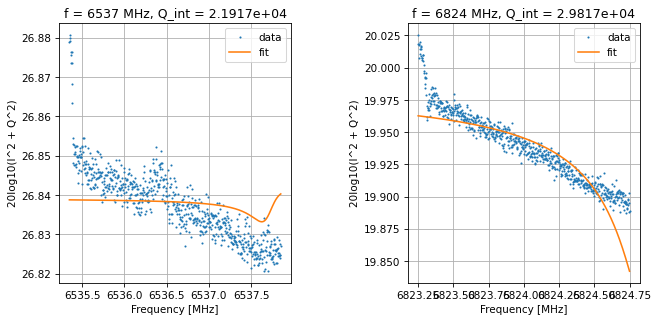

Frequencies out are: [6537.706887104827, 6824.969753697351] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 76.723 s


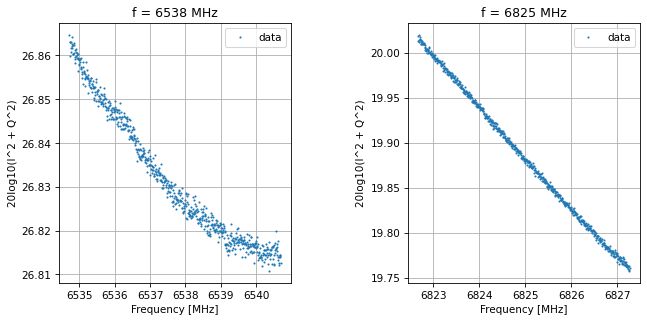

Saving data-2024-05-05-00-36-34
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.410 s


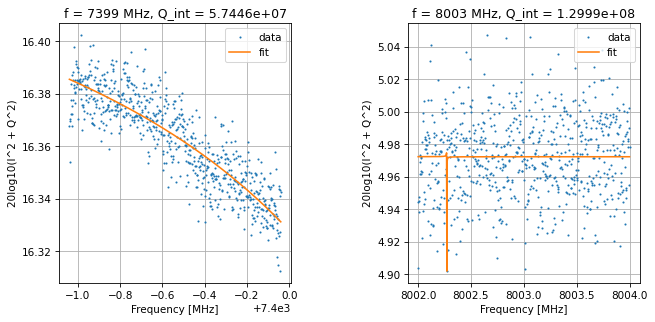

Frequencies out are: [7401.895966522689, 8002.271531368733] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.980 s


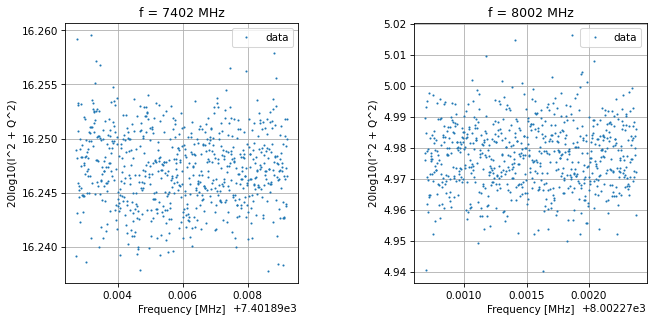

 55%|█████▌    | 11/20 [8:44:42<7:09:11, 2861.31s/it]

Saving data-2024-05-05-00-38-08
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.587 s


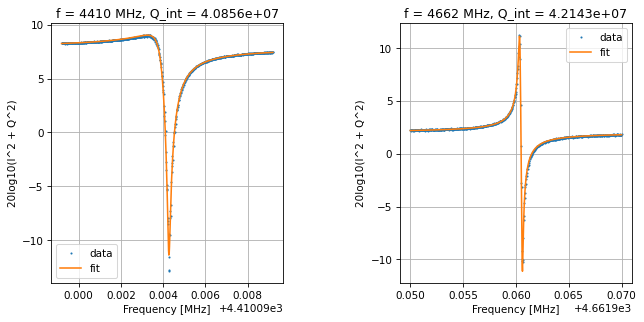

Frequencies out are: [4410.094030024442, 4661.9603677657315] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.384 s


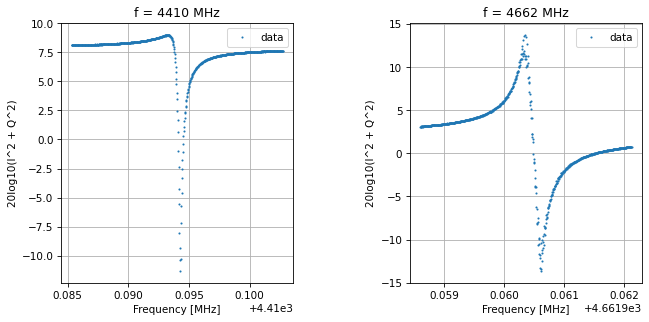

Saving data-2024-05-05-01-19-44
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.999 s


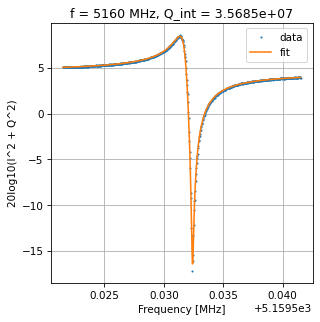

Frequencies out are: [5159.531778885005] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.935 s


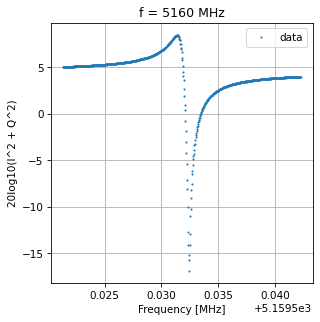

Saving data-2024-05-05-01-21-17
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.579 s


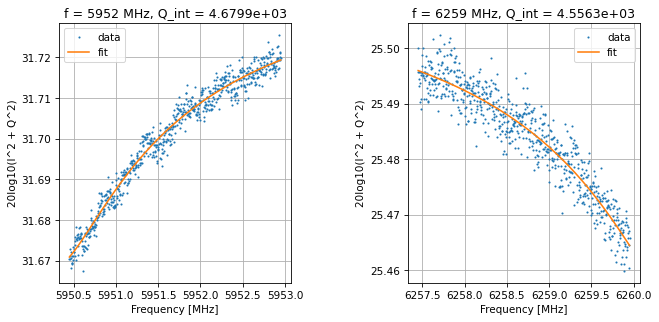

Frequencies out are: [5949.628750765427, 6261.213521635422] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.520 s


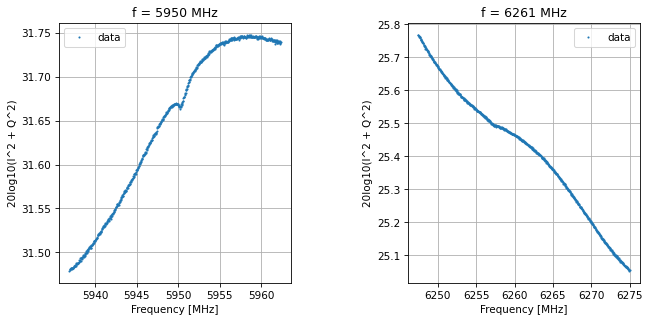

Saving data-2024-05-05-01-22-39
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.529 s


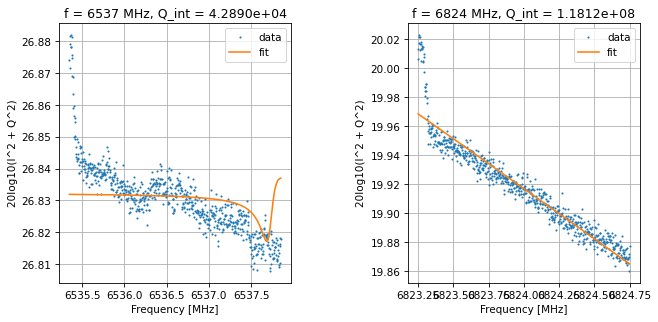

Frequencies out are: [6537.725321503085, 7419.97372021728] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.280 s


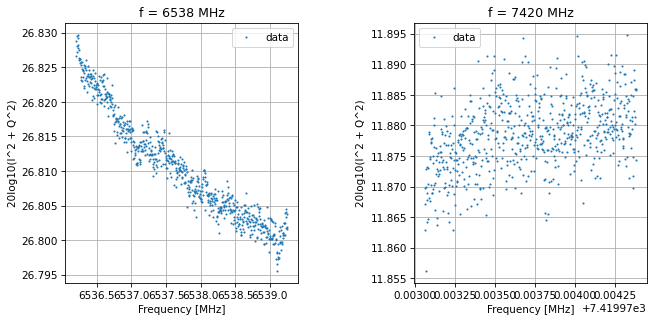

Saving data-2024-05-05-01-24-15
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.713 s


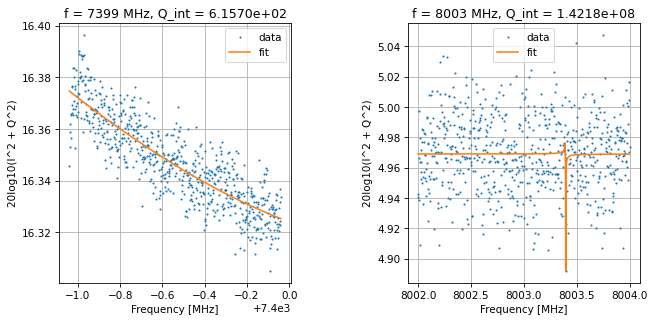

Frequencies out are: [7408.301349416456, 8003.394957557541] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.325 s


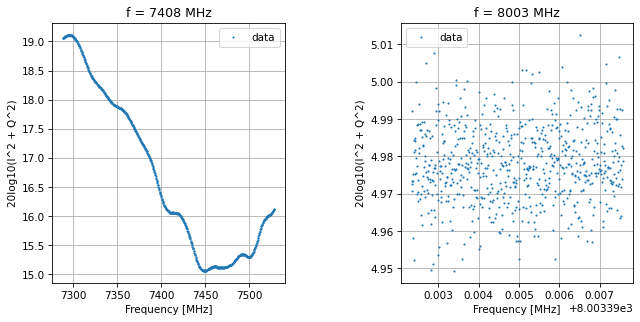

 60%|██████    | 12/20 [9:32:25<6:21:35, 2861.92s/it]

Saving data-2024-05-05-01-25-51
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.640 s


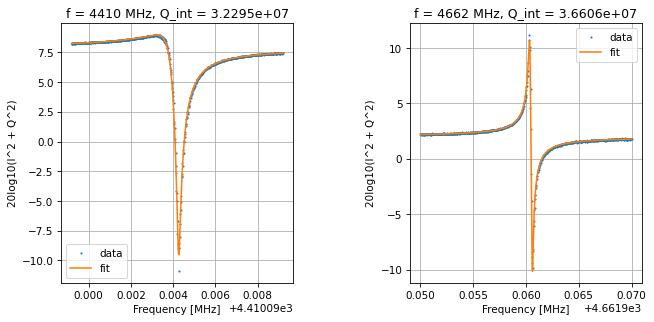

Frequencies out are: [4410.094022422438, 4661.960366517539] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.434 s


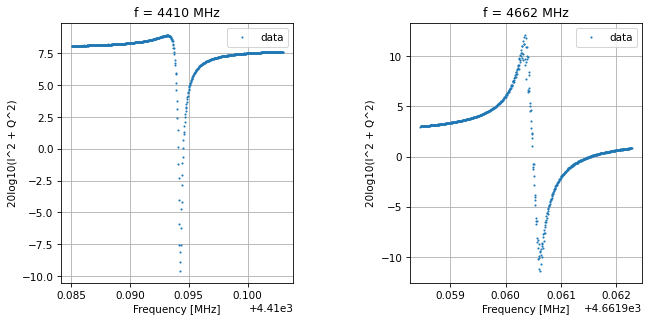

Saving data-2024-05-05-02-07-27
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.854 s


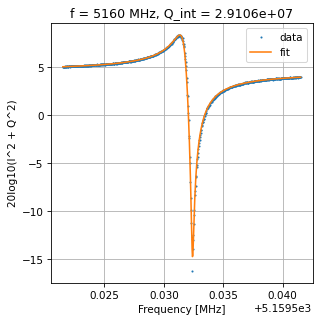

Frequencies out are: [5159.531780512945] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.586 s


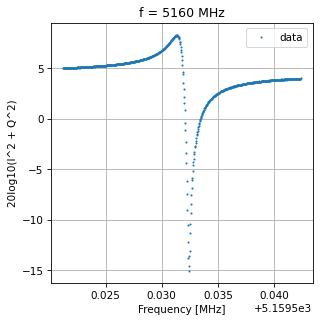

Saving data-2024-05-05-02-09-00
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.155 s


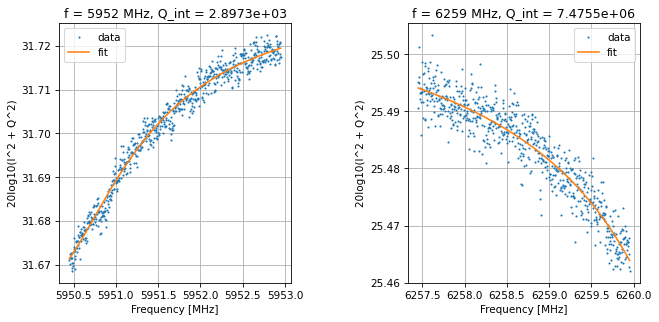

Frequencies out are: [5949.937742561157, 6261.927535848625] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.541 s


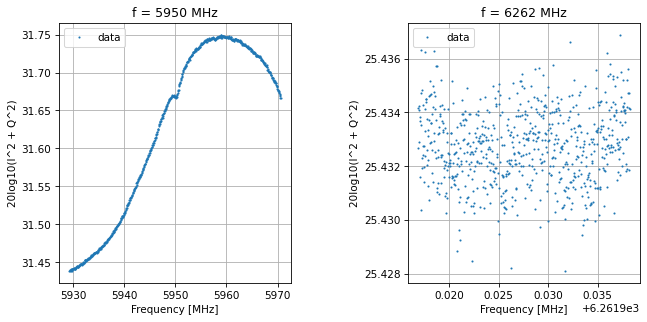

Saving data-2024-05-05-02-10-21
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.713 s


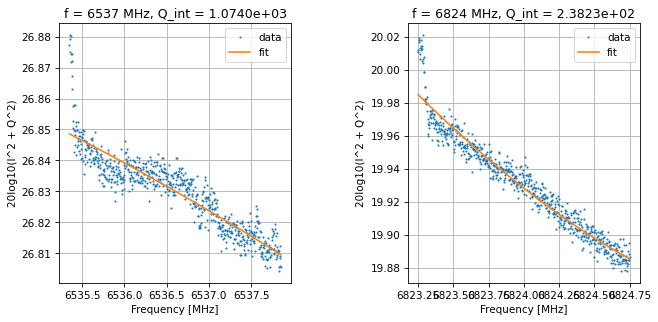

Frequencies out are: [6559.686519830555, 6872.295743626744] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.510 s


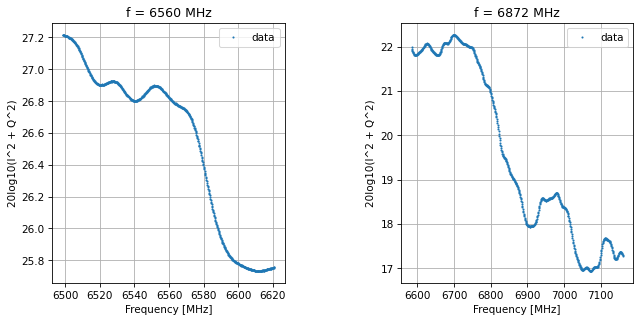

Saving data-2024-05-05-02-11-56
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.750 s


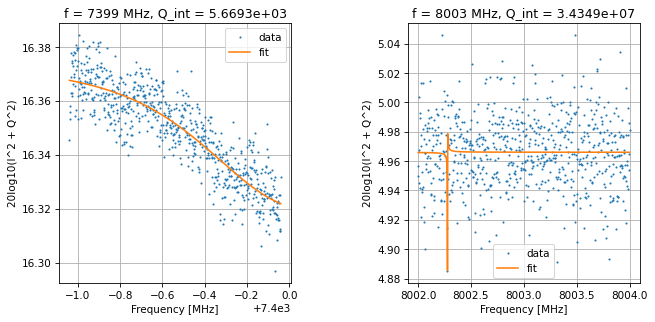

Frequencies out are: [7399.886373187445, 8002.277279639026] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.277 s


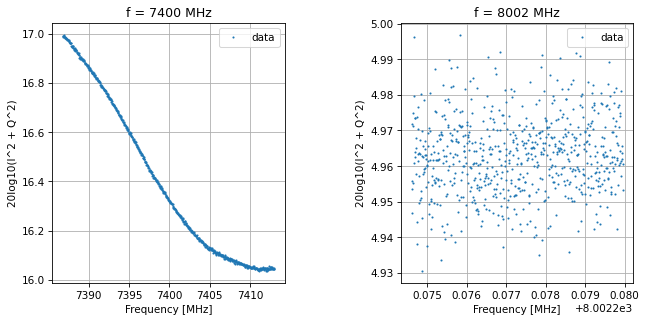

 65%|██████▌   | 13/20 [10:20:06<5:33:51, 2861.70s/it]

Saving data-2024-05-05-02-13-33
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.624 s


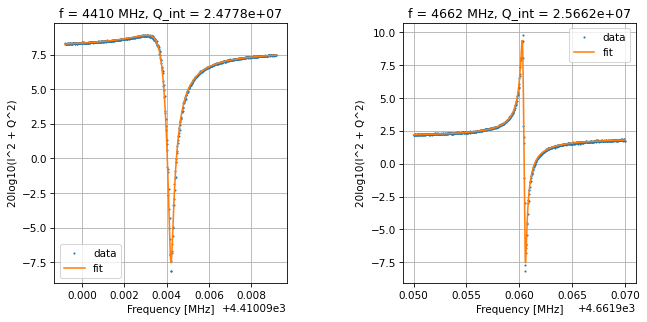

Frequencies out are: [4410.093969215786, 4661.960321327478] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.498 s


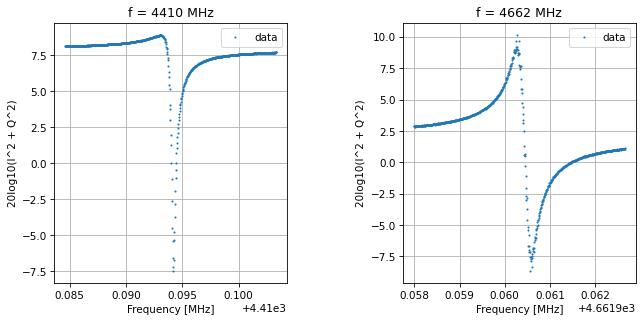

Saving data-2024-05-05-02-55-08
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 13.095 s


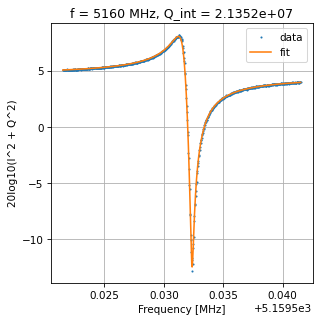

Frequencies out are: [5159.531725793918] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.702 s


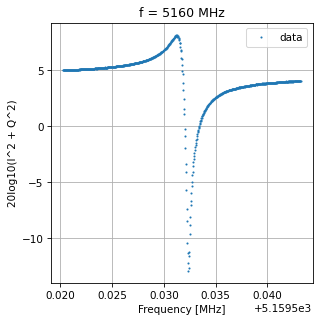

Saving data-2024-05-05-02-56-41
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.681 s


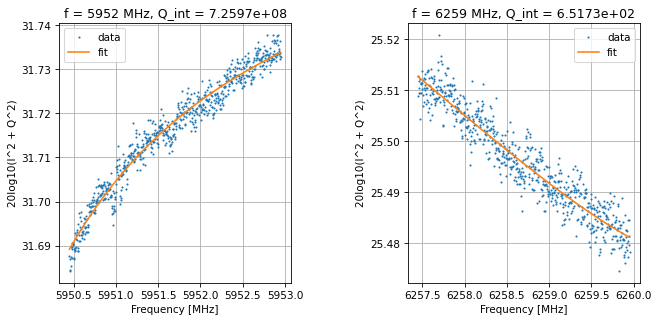

Frequencies out are: [5947.616046499852, 6266.062123033468] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.460 s


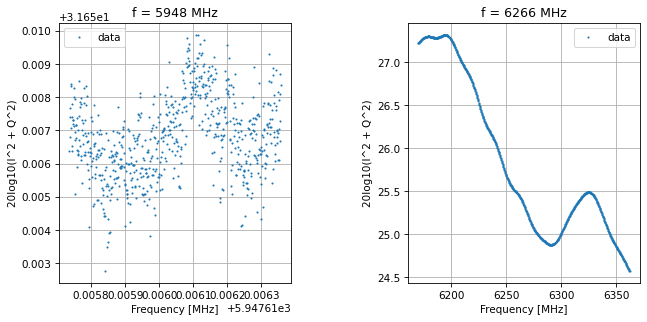

Saving data-2024-05-05-02-58-03
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.593 s


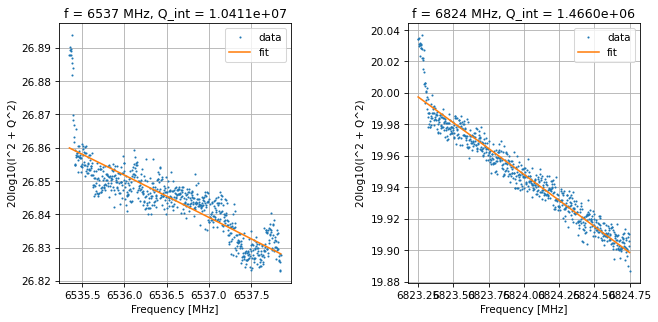

Frequencies out are: [6676.85553103636, 7251.484961530347] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.296 s


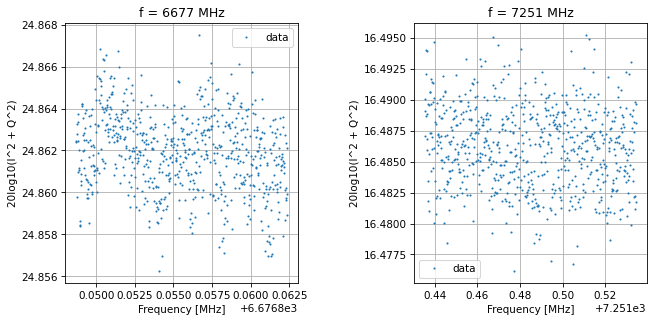

Saving data-2024-05-05-02-59-40
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.656 s


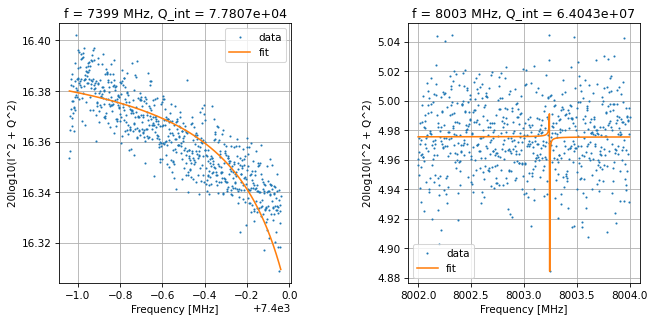

Frequencies out are: [7400.250468419656, 8003.244840862678] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.306 s


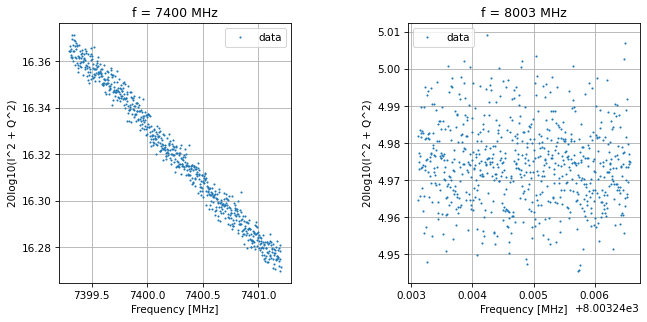

 70%|███████   | 14/20 [11:07:49<4:46:12, 2862.12s/it]

Saving data-2024-05-05-03-01-15
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.535 s


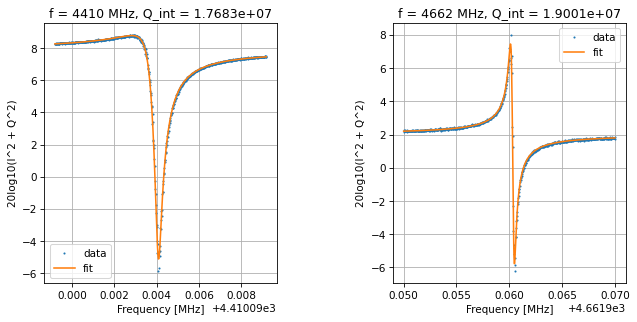

Frequencies out are: [4410.093850648682, 4661.960204433131] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.346 s


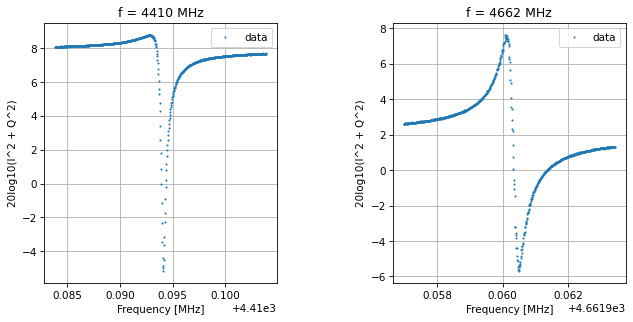

Saving data-2024-05-05-03-42-51
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.868 s


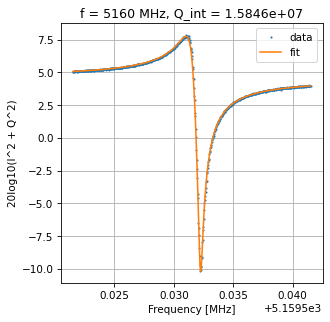

Frequencies out are: [5159.531596704727] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.695 s


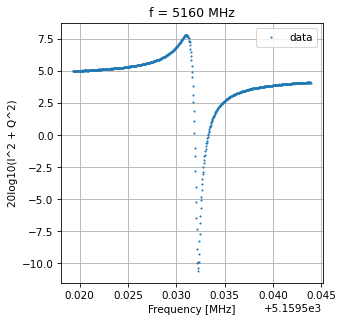

Saving data-2024-05-05-03-44-24
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.710 s


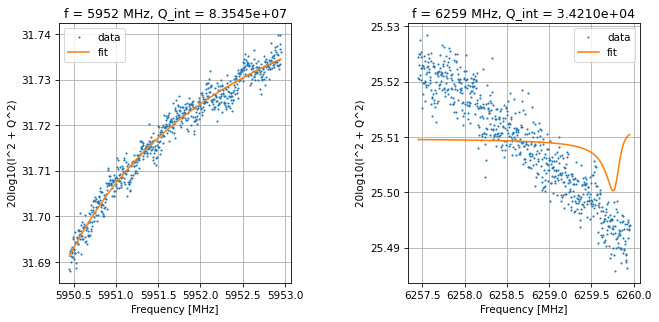

Frequencies out are: [5948.112766942331, 6259.785948422733] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.213 s


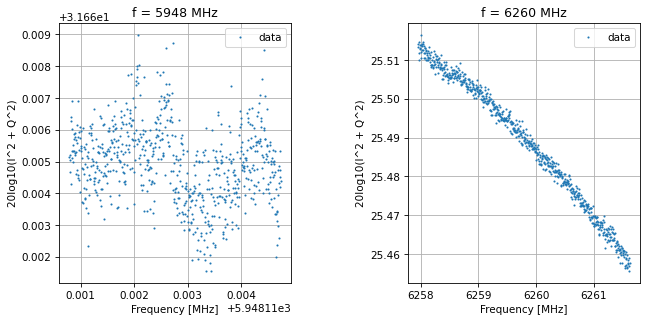

Saving data-2024-05-05-03-45-46
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.283 s


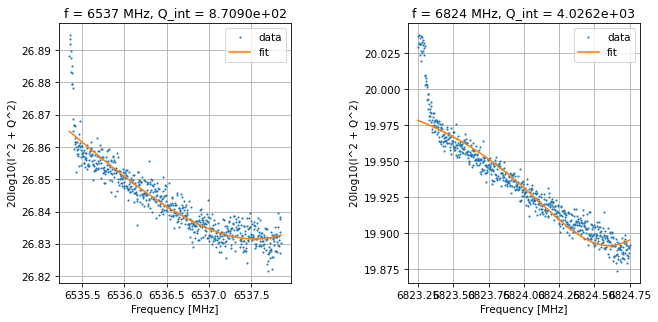

Frequencies out are: [6541.375556177382, 6824.70033129621] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.269 s


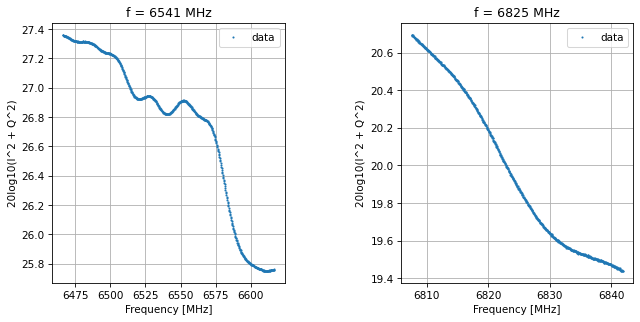

Saving data-2024-05-05-03-47-21
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.654 s


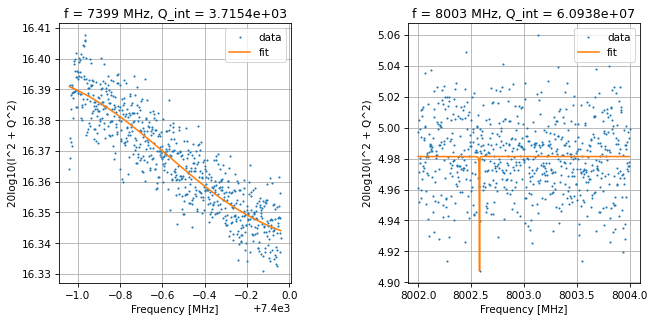

Frequencies out are: [7399.423639232411, 8002.5798876587] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.306 s


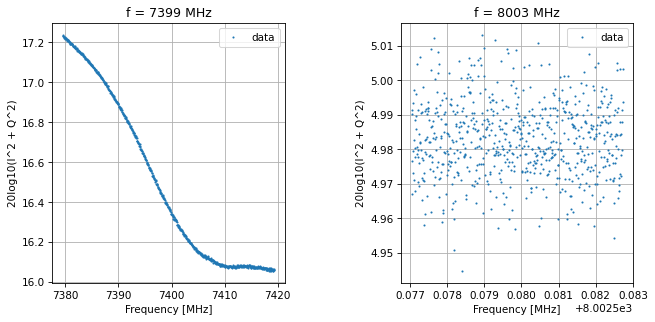

 75%|███████▌  | 15/20 [11:55:31<3:58:29, 2861.91s/it]

Saving data-2024-05-05-03-48-57
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.628 s


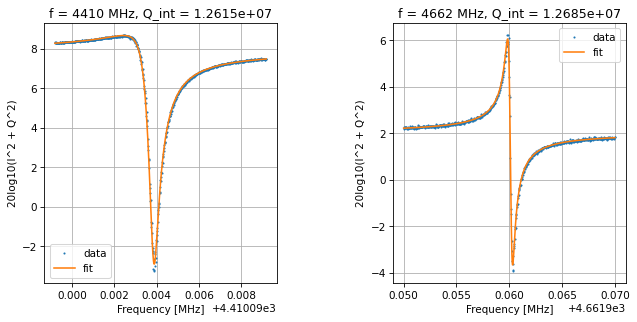

Frequencies out are: [4410.093633887177, 4661.959990713899] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.147 s


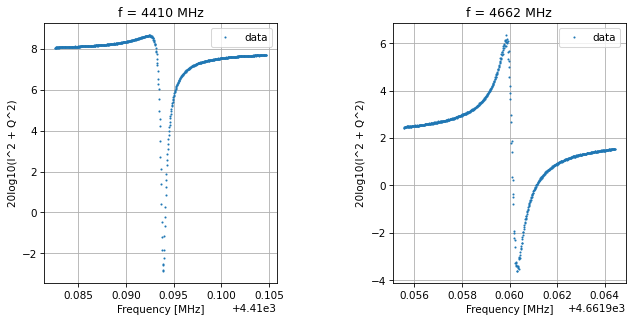

Saving data-2024-05-05-04-30-33
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.977 s


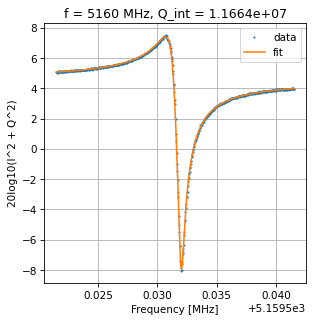

Frequencies out are: [5159.531364520646] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.853 s


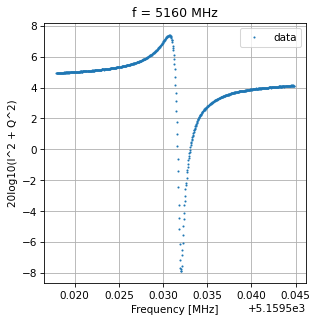

Saving data-2024-05-05-04-32-05
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.561 s


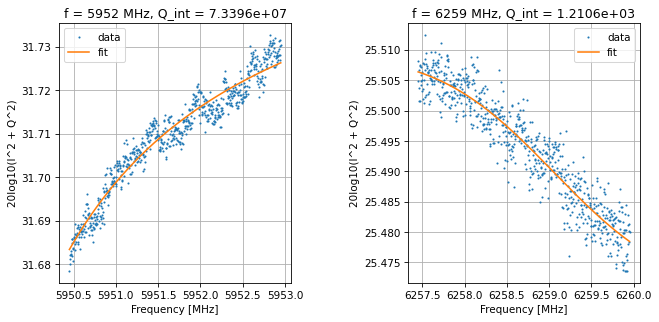

Frequencies out are: [5947.907104547479, 6259.058652979586] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.274 s


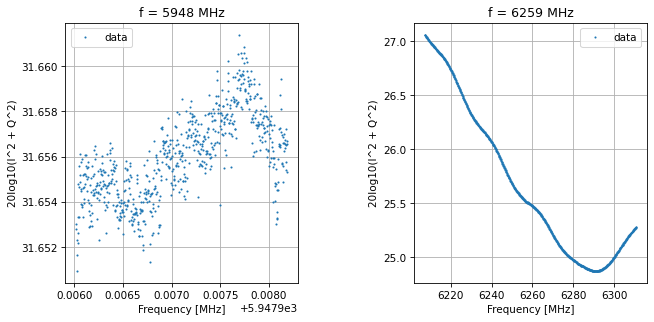

Saving data-2024-05-05-04-33-27
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.680 s


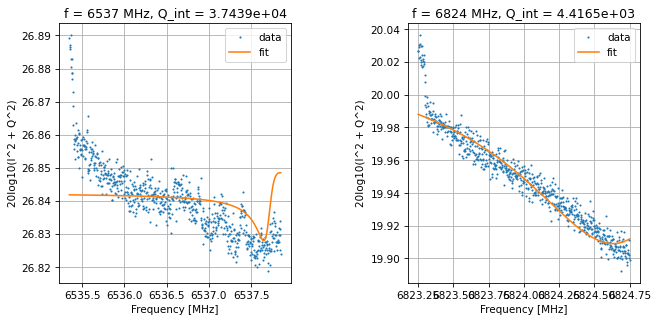

Frequencies out are: [6537.704233668809, 6824.815659652428] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.495 s


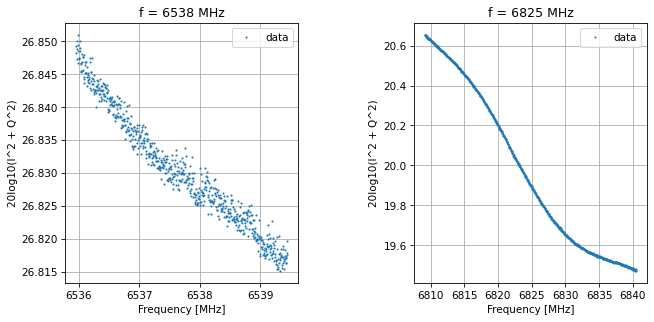

Saving data-2024-05-05-04-35-03
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.621 s


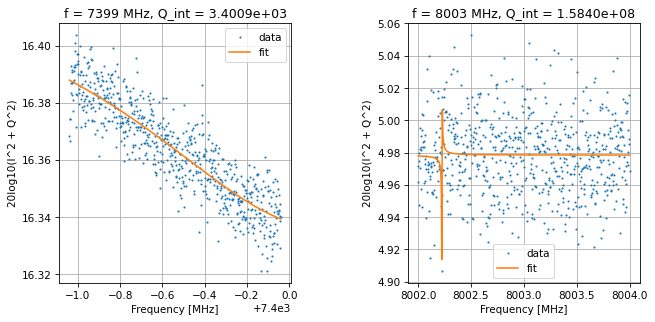

Frequencies out are: [7400.155708761169, 8002.225485035009] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.543 s


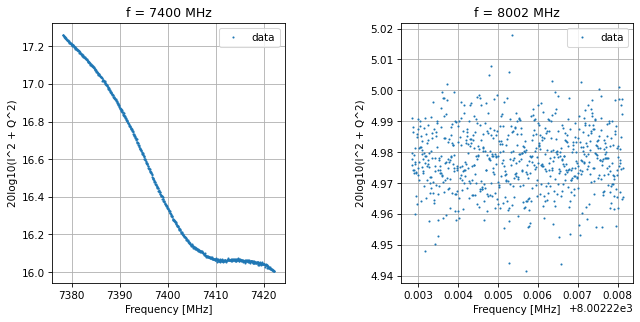

 80%|████████  | 16/20 [12:43:13<3:10:48, 2862.01s/it]

Saving data-2024-05-05-04-36-39
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.705 s


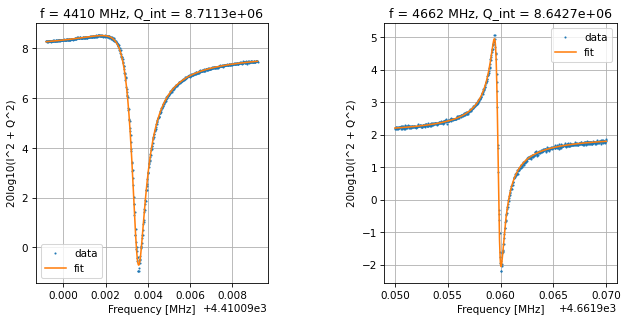

Frequencies out are: [4410.093297339357, 4661.959655142237] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.240 s


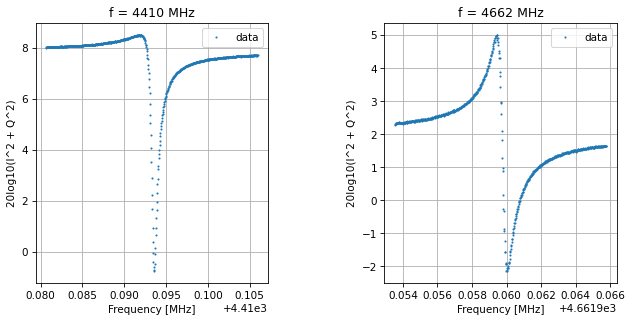

Saving data-2024-05-05-05-18-15
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.973 s


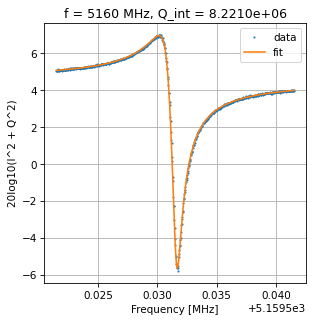

Frequencies out are: [5159.530991230437] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.893 s


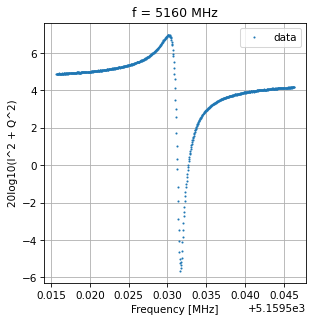

Saving data-2024-05-05-05-19-48
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.783 s


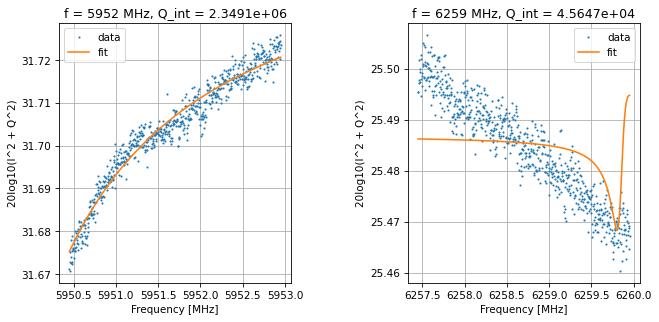

Frequencies out are: [5948.533314238388, 6259.846778987773] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.225 s


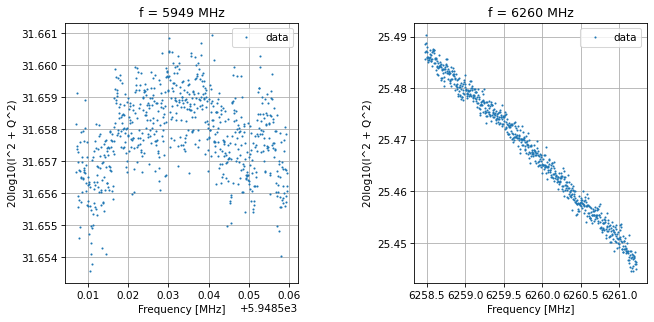

Saving data-2024-05-05-05-21-10
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.756 s


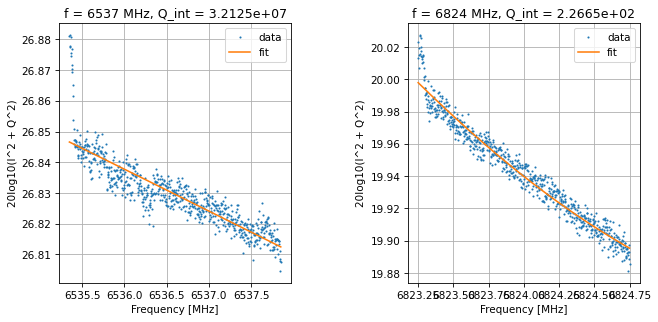

Frequencies out are: [7117.647182130809, 6883.278457407264] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.537 s


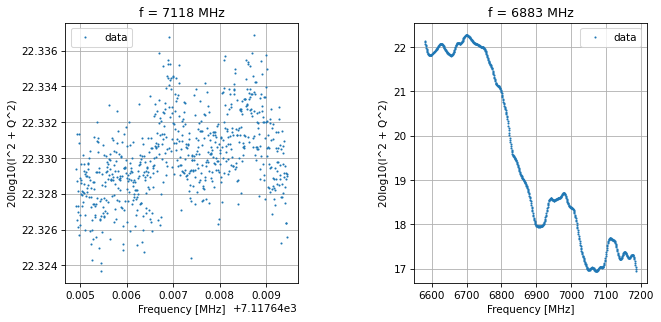

Saving data-2024-05-05-05-22-47
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.240 s


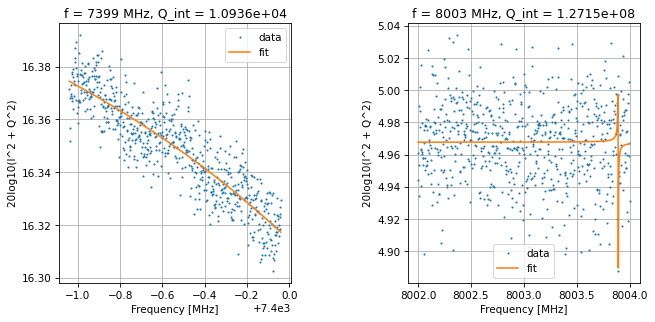

Frequencies out are: [7403.184800177879, 8003.892298415743] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.255 s


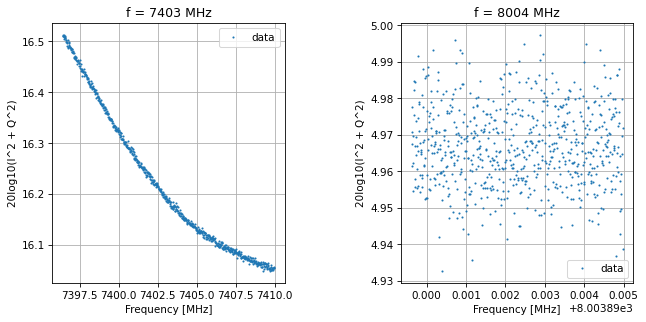

 85%|████████▌ | 17/20 [13:30:56<2:23:06, 2862.31s/it]

Saving data-2024-05-05-05-24-22
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.683 s


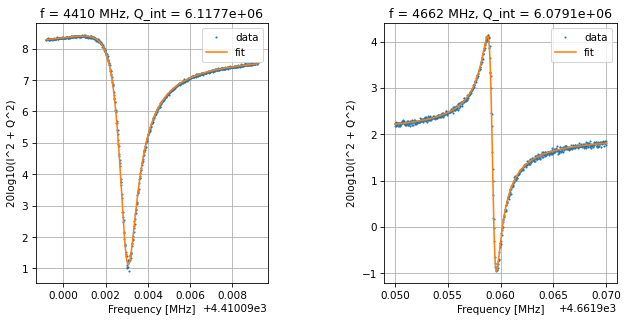

Frequencies out are: [4410.092781306039, 4661.959132870891] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.185 s


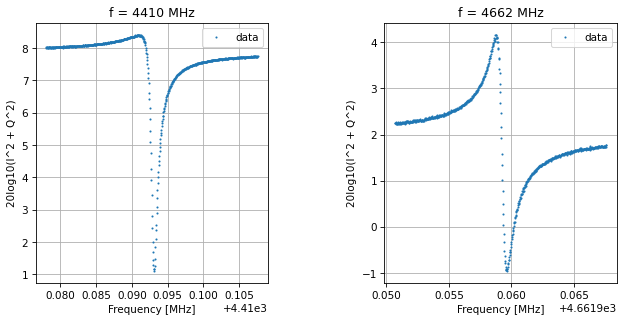

Saving data-2024-05-05-06-05-58
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.935 s


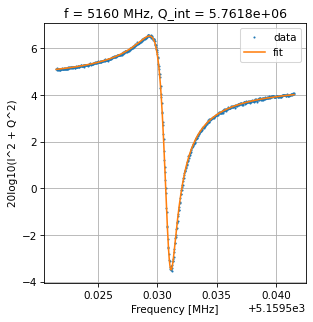

Frequencies out are: [5159.530416727131] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.735 s


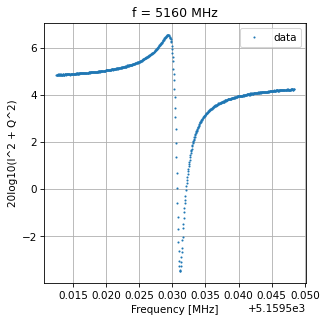

Saving data-2024-05-05-06-07-31
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 14.988 s


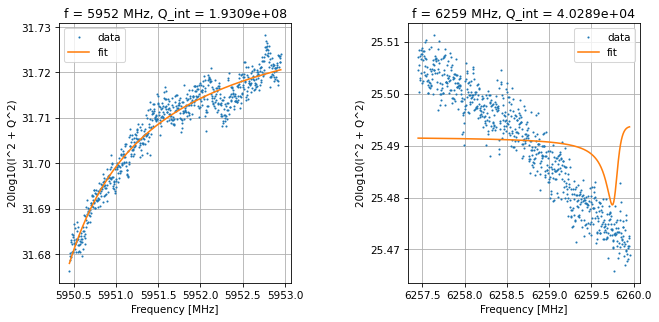

Frequencies out are: [5949.456240486107, 6259.776548021757] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.405 s


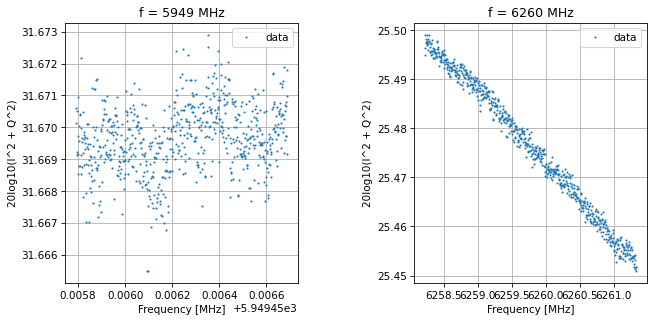

Saving data-2024-05-05-06-08-52
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.731 s


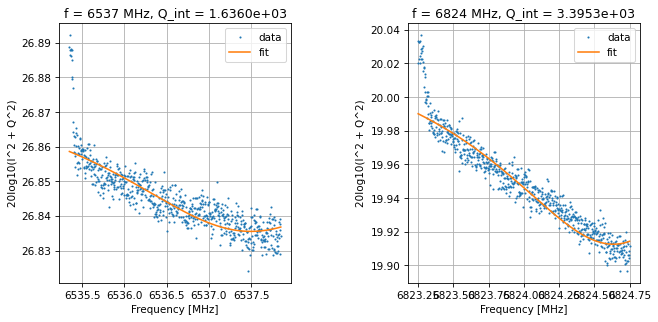

Frequencies out are: [6537.435601087779, 6824.802311556481] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.609 s


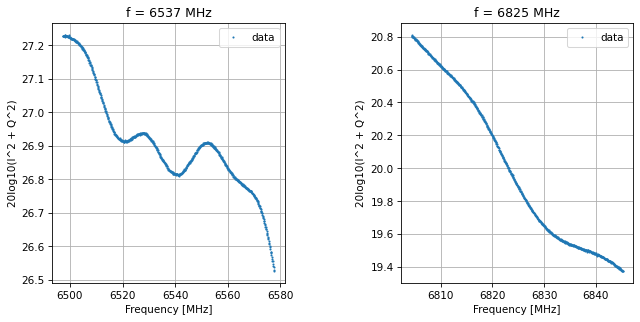

Saving data-2024-05-05-06-10-27
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.673 s


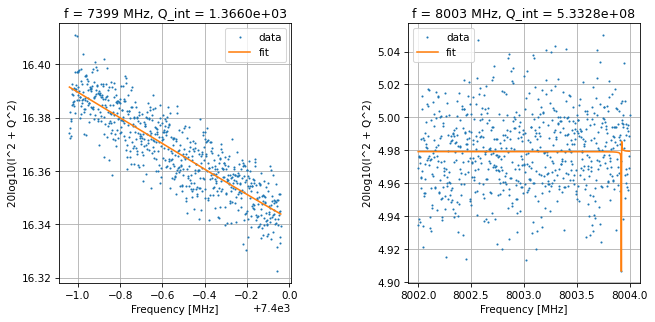

Frequencies out are: [7404.147161955819, 8003.923023880571] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.277 s


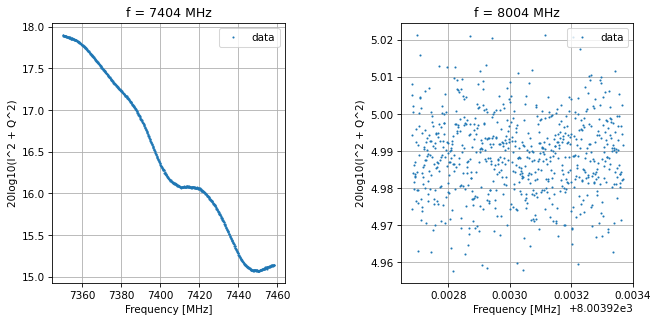

 90%|█████████ | 18/20 [14:18:37<1:35:23, 2861.85s/it]

Saving data-2024-05-05-06-12-03
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.622 s


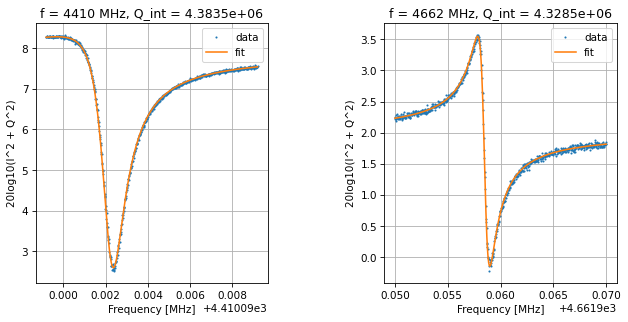

Frequencies out are: [4410.09204160893, 4661.958375263286] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.884 s


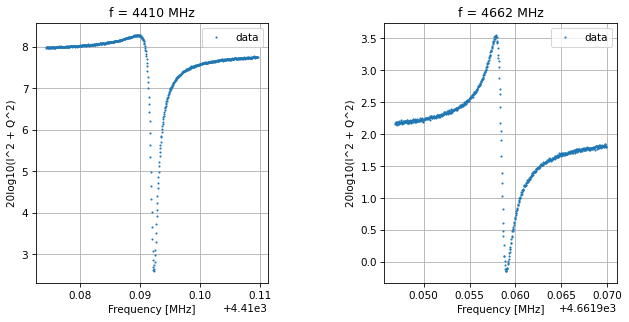

Saving data-2024-05-05-06-53-39
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 13.032 s


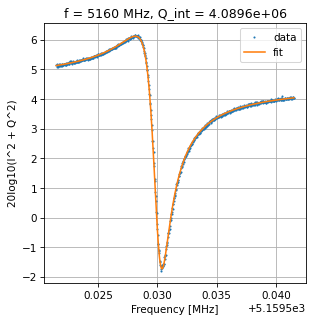

Frequencies out are: [5159.529573418912] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.927 s


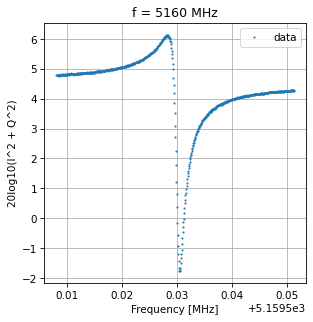

Saving data-2024-05-05-06-55-11
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.579 s


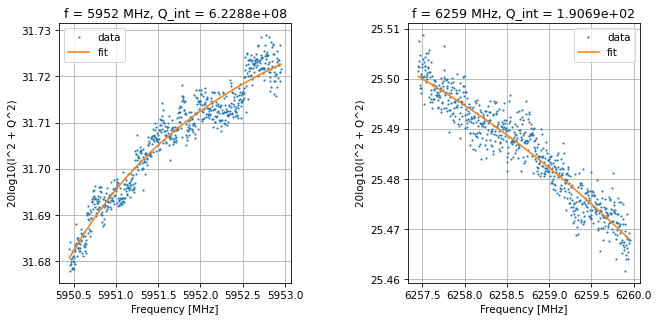

Frequencies out are: [5947.748107678171, 6267.349466310044] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.375 s


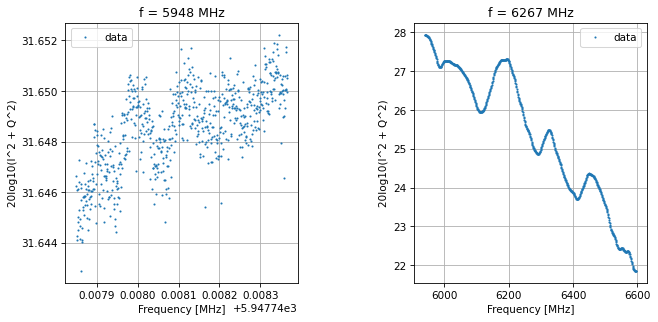

Saving data-2024-05-05-06-56-33
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.689 s


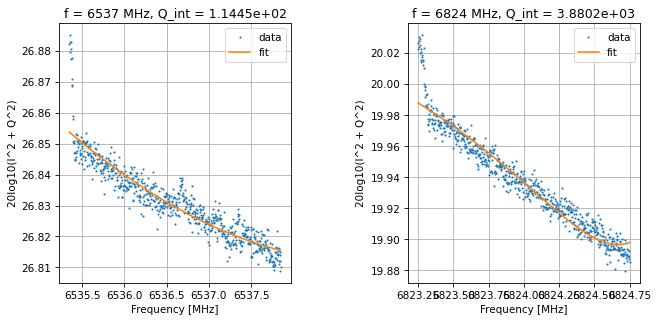

Frequencies out are: [6612.752575327121, 6825.414160696024] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.558 s


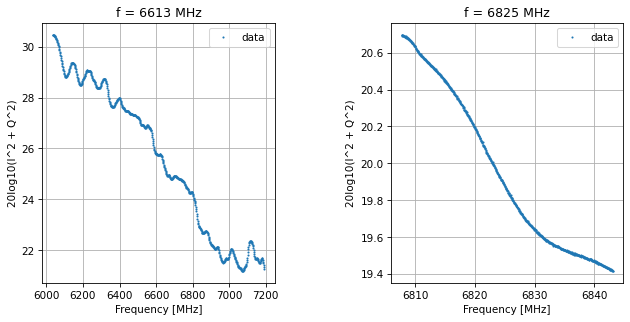

Saving data-2024-05-05-06-58-10
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.623 s


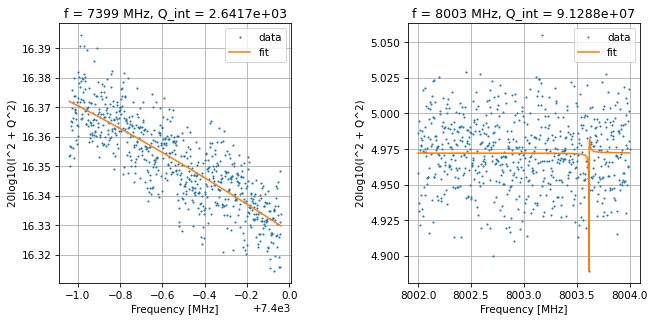

Frequencies out are: [7402.516255305934, 8003.617979327111] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.328 s


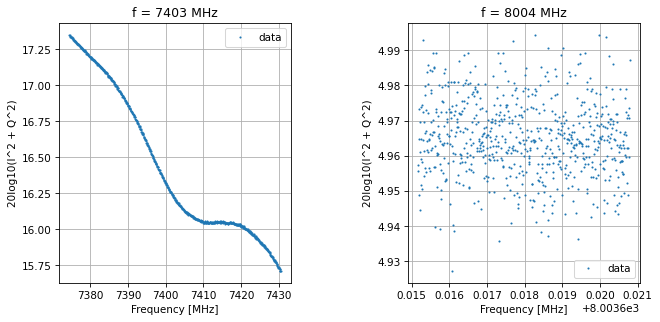

 95%|█████████▌| 19/20 [15:06:19<47:42, 2862.15s/it]  

Saving data-2024-05-05-06-59-46
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [4410.09419, 4661.96] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.620 s


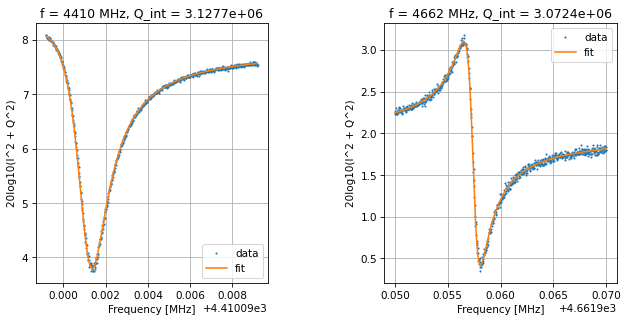

Frequencies out are: [4410.090984456695, 4661.957306929528] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.127 s


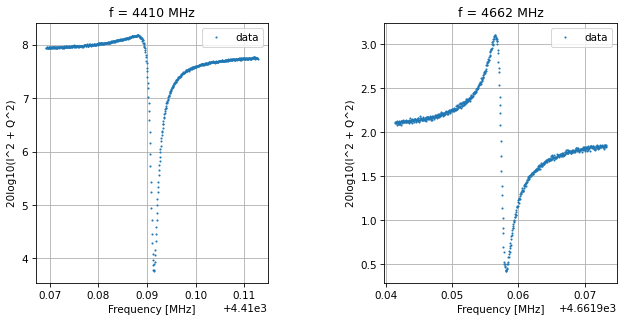

Saving data-2024-05-05-07-41-22
Frequencies out are: [5159.5315] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 13.006 s


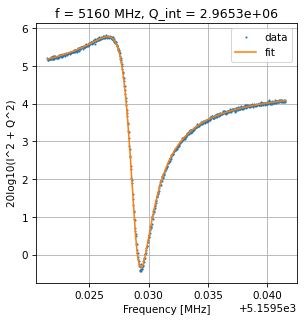

Frequencies out are: [5159.528440475286] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 64.833 s


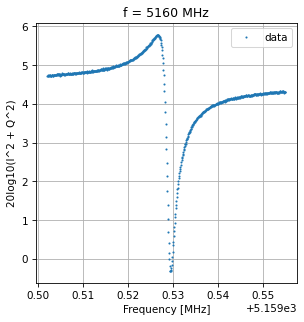

Saving data-2024-05-05-07-42-54
C:\Users\my\Documents\GitHub\HouckLab_QICK\WorkingProjects\QM_Team\resonator_measurements\FFS
Frequencies out are: [5951.7, 6258.7] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.598 s


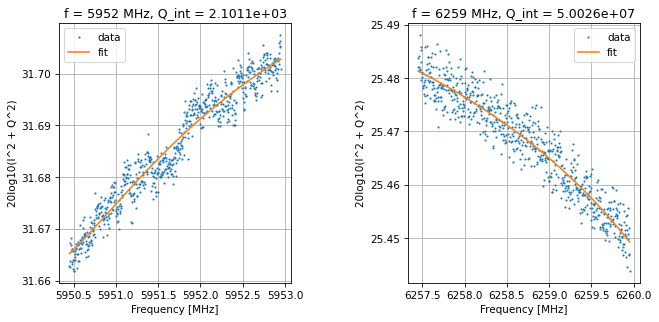

Frequencies out are: [5948.679454217185, 6264.41797158625] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.453 s


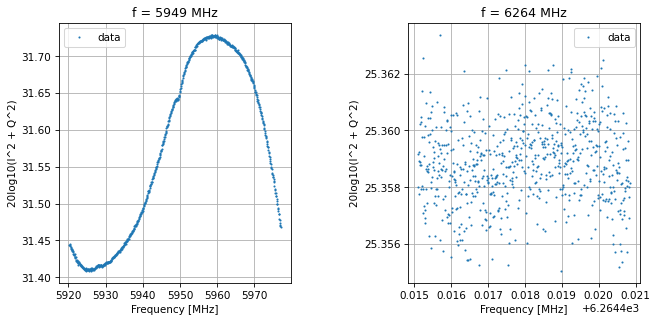

Saving data-2024-05-05-07-44-16
Frequencies out are: [6536.6, 6824.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.717 s


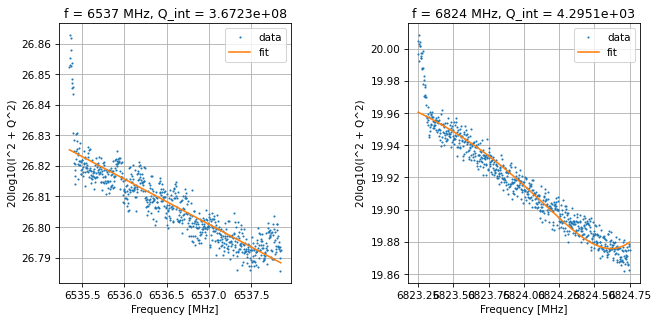

Frequencies out are: [7250.944985135028, 6824.983320698438] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 77.854 s


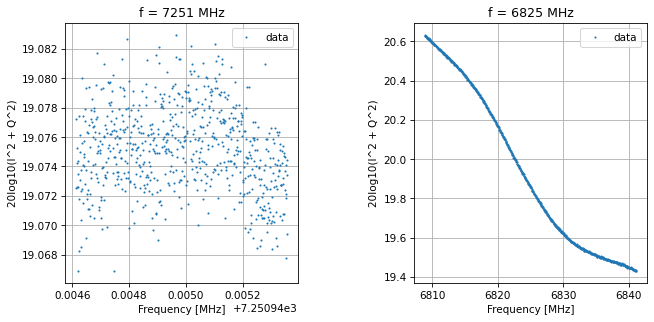

Saving data-2024-05-05-07-45-53
Frequencies out are: [7399.46, 8003.0] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.485 s


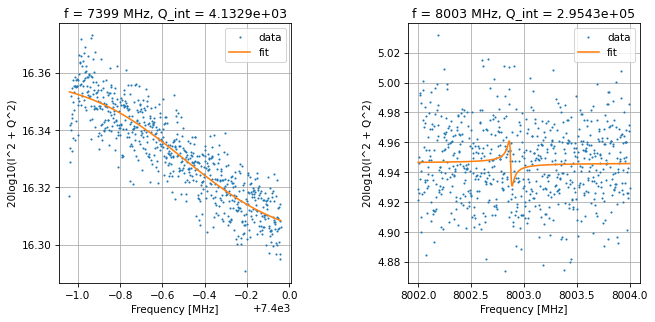

Frequencies out are: [7399.500472412671, 8002.875533910536] MHz


  0%|          | 0/5 [00:00<?, ?it/s]

Final time = 78.273 s


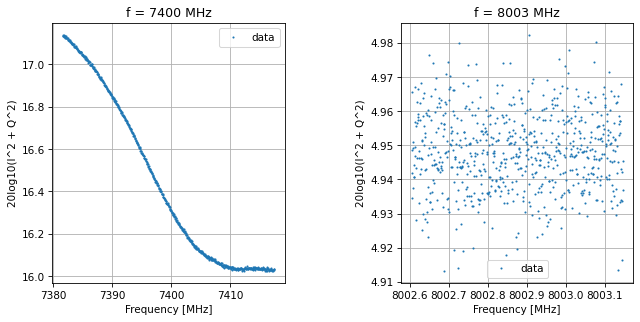

100%|██████████| 20/20 [15:54:02<00:00, 2862.11s/it]

Saving data-2024-05-05-07-47-28
Time for measurement:
15:54:02.207079


In [12]:
# remember to check that lakeshore is on PID mode and current heater range is correct
# set temperatures
temps = np.arange(0.250,0.750,0.025)
print(temps)

# run_FFS has built in wait time


# Main for loop:
start_time = time.time()
run_FFS(temps, socs, chipDicts, soccfgs, turbo=True,
       dBm_lookups=['10_atten-channel-1_rack-setup_2024-03-08.npz','11_atten-channel-2_rack-setup_2024-03-08.npz'])#Turbo true for low T measurement
end_time = time.time()
print('Time for measurement:')
print(datetime.timedelta(seconds=end_time-start_time))
tc.setTemp(0)

In [12]:
tc.setTemp(0)